# MNIST
MNIST - a dataset of 70,000 images of handwritten digits (0, 1, 2, ... 9).<br>
Number of features for each picture: 785 (28x28 pixels per image, plus label)<br>

MNIST - available on <font color='blue'><b>OpenML</b></font> (<i>Open Machine Learning</i> - an open science online platform for ML, which holds open data, open algorithms and tasks: https://www.openml.org/)
#### More about MNIST:
https://www.openml.org/d/554<br>
<br>
<font color='blue'><b>Fetch</b></font> the MNIST dataset (<i>fetch</i> - retrieval of data by a software program, script, or hardware device; after being retrieved, the data is moved to an alternate location or displayed on a screen.)

In [5]:
import numpy as np
import pandas as pd


# Set print options:
# We want to print arrays or dataframes on the full page width in Jupyter Notebook

# Note: the following settings - determined after some trials

# Set some print options for NumPy arrays:

np.set_printoptions(edgeitems=60,    # Number of array items at the beginning and end of each dimension
                    linewidth=600,   # Number of characters per line 
                    precision=3)     # Number of digits for floating point numbers


# Set some print options for Pandas DataFrames:

pd.set_option('display.max_rows', 100)    # Maximum no. of DataFrame rows
pd.set_option('display.max_columns', 10)  # Maximum no. of DataFrame columns
pd.set_option('display.width', 600)       # Number of characters per line

In [6]:
# from sklearn.datasets import fetch_openml


# mnist = fetch_openml('mnist_784', version=1)  # Check that the MNIST filename on OpenML is mnist_784

# # Once the MNIST dataset is downloaded and fetched as a dictionary, you can save it locally as a numpy array:
# np.save('/home/Curs_IA/Classification-ML/MNIST.npy', mnist)  # to see the path, use terminal to navigate to this
#                                                          # folder (eg. datasets), then issue the pwd command

# Now, you can comment all the lines from this cell. Next time you open the notebook, use only the following cell
# to load the saved MNIST dictionary.

In [7]:
%config IPCompleter.greedy=True  #activates Intellisense (and others); press Tab for commands, Shift+Tab for params


mnist = np.load('/home/marius/Curs_IA/Classification-ML/MNIST.npy', allow_pickle='TRUE').item()
                        # allow_pickle: allows loading pickled object arrays stored in npy files. 
                        # item(): converts back the saved array to a dictionary

print(mnist.keys())     # Datasets loaded by sklearn usualy have a dictionary structure 

mnist['data']
# Remember about dictionaries:
# dic = {'Apt.1': 'Popescu', 'Apt.2': "Ionescu"}
# print(dic.keys())
# print(dic.values())
# print(dic.items())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


,pixel1,pixel2,pixel3,pixel4,pixel5,...,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


#### DESCR:
- key describing the dataset

#### data:
- key containing a pandas dataframe with one row per instance (one row for each handwritten digit) and one column per feature (one column for each pixel)

#### target:
- key containing a Pandas Series of labels (each label - what digit is represented in each row from data)

In [8]:
# print(mnist['DESCR'])
# print(mnist['url'])
# print(mnist['target'])


# Check to see the object type for 'data' and 'target':

print(type(mnist['target']))  # <class 'pandas.core.series.Series'> --> Pandas Series

print(type(mnist['data']))    # <class 'pandas.core.frame.DataFrame'> --> Pandas DataFrame; Or:

print(isinstance(mnist['data'], pd.DataFrame))  # True

print(mnist['data'])  # The first and last pixels are usually zero (they are close to the sides of the pictures)


# => print some pixels with values different from zero:

print(mnist['data'].loc[350:360, 'pixel350':'pixel359'])  # In Pandas "loc" function, the last index is also
                                                          # included in the selection (eg.: 360 and pixel 359)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
True
       pixel1  pixel2  pixel3  pixel4  pixel5  ...  pixel780  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...     ...  ...       ...       ...       ...       ...       ...
69995     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
69997     0.

In [9]:
# The MOST IMPORTANT MNIST keys are:

#       mnist['data']   -> DataFrame of all figures (on each row -> pixel intensities of one image)
#       mnist['target'] -> Pandas Series (one column) of labels


# In our ML project, we will use NumPy arrays instead of Pandas objects (ML algoritms like array structures):

X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()  # X: array of images; y: array of targets (labels)


print(X.shape)  # (70000, 784); for eg., X[9] -> the 9-th digit from the set;
                #               each row has the 784 pixels of one image (28x28 pixels/img)

print(y.shape)  # (70000,)

print(y.dtype)  # object type (here, this means "string" type)

# Note: most ML algorithms expect numbers instead of strings => cast y to integer:
y = y.astype(np.uint8)  # here, astype() is a numpy method

print(X[350:361, 349:361])

(70000, 784)
(70000,)
object
[[  0.   0.   3. 146. 251. 250.  52.   0.   0.   0.   0.   0.]
 [  0. 180. 253. 251. 251. 142.   0.   0.   0.   0.   0.   0.]
 [254. 253. 207. 254. 253. 227.  42.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  39. 230. 252. 185.  21.   0.   0.   0.   0.]
 [  0.   0. 102. 253. 252. 102.   0.   0.   0.   0.   0.   0.]
 [ 83. 254. 254. 254. 183.  19.   0.   0.   0.   0.   0.   0.]
 [177. 253. 253. 253. 234.  19.   0.   0.   0.   0.   0.   0.]
 [ 47. 211. 253. 251. 235.  82.   0.   0.   0.   0.   0.   0.]
 [254. 254.  95.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 200. 254.  96.   0.]
 [239. 253. 253. 149.   0.   0.   0.   0.   0.   0.   0.   0.]]


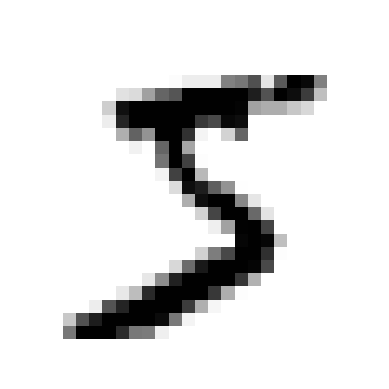

5


In [10]:
# Now, show the picture of one image from X:

import matplotlib.pyplot as plt


some_digit = X[0]  # the handwritten digit that we want to plot
# print(X[0])

some_digit_image = some_digit.reshape(28, 28)  # each image is 28x28 pixels => reshape X[0] (which is 1D)
                                               # to a 2D array

plt.imshow(some_digit_image, cmap='binary')  # prints the first figure (X[0]), using a reversed grayscale colormap
plt.axis('off')  # No coordinate axes
plt.show()

print(y[0])

MNIST is already split into a training set and a test set, and preprocessed (shuffled, images centered, etc.). The full set is arranged as follows:
- training set: first 60000 images;
- test set: last 10000 images.<br>

Let's see more handwritten digits from this dataset:
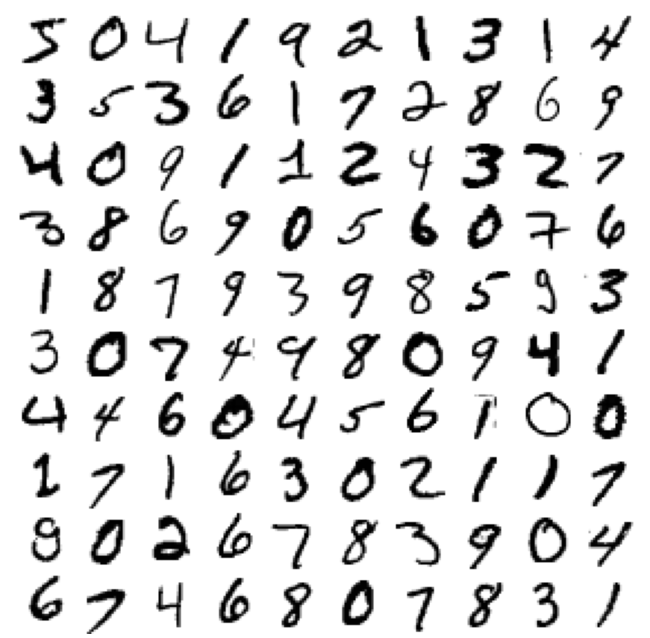

Now, select the training and test sets: 

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(y_train[:40])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]


### At this moment, we have the following arrays:
- <font color='blue'><b>X</b></font>: the original array of data (70,000 images, 28x28 pixels = 784 values/row)
- <font color='blue'><b>y</b></font>: the original array of labels (target values)
- <font color='blue'><b>some_digit = X[0]</b></font>: image representing the first handwritten digit (5)
- <font color='blue'><b>X_train</b></font>: training set (first 60,000 images)
- <font color='blue'><b>y_train</b></font>: training labels (first 60,000 target values)
- <font color='blue'><b>X_test</b></font>: testing set (the last 10,000 images)
- <font color='blue'><b>y_test</b></font>: testing labels (the last 10,000 labels)

#### Let's train a model to identify <u>only one</u> handwritten digit, for example 5. A <font color='blue'><b>binary classifier</b></font> we be used.
#### Training steps:
1. Prepare the following target vectors (labels) for binary classification; labels should be <i>True</i> and <i>False</i> instead of numbers from 0 to 9:
- <font color='blue'><b>y_train_5</b></font>: a vector of <u>training</u> labels, consisting of <i>True</i> when 5 is found in <font color='blue'><b>y_train</b></font>, and <i>False</i> otherwise;
- <font color='blue'><b>y_test_5</b></font>: a vector of <u>testing</u> labels consisting of <i>True</i> when 5 is found in <font color='blue'><b>y_test</b></font>, and <i>False</i> otherwise.

2. Use <font color='blue'><b>Stochastic Gradient Descent</b></font> as a binary classifier (works with instances one at a time => good for online training):
- use the <font color='blue'><b>SGDClassifier</b></font> class to define an object; name this object <i><b>sgd_clf</b></i>;
- train <i><b>sgd_clf</b></i> on <i><b>X_train</b></i> and <i><b>y_train_5</b></i> (use the <i><b>fit</b></i> method);

3. Check various images from <i><b>X</b></i> to detect if they are number 5 or not (use the <i><b>predict</b></i> method of <i><b>sgd_clf</b></i>).

In [12]:
# 1. Prepare the target vectors (labels) for this binary classification:
# ----------------------------------------------------------------------

y_train_5 = (y_train == 5)  # use the mask "y_train_5" -> vector of True (when 5 is found) and False (otherwise)

y_test_5 = (y_test == 5)

print(y_train_5[:15])  # Check to see if the results are good: [True False False False False ...]

print(y_train[:15])    # [5 0 4 1 9 ...]

# Note: this approach will train the classifier to associate images with True (and not with 5) or False.
# So,the classifier will tell us: this image is True, this one is False, the next one is also False, etc.

[ True False False False False False False False False False False  True False False False]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [13]:
# 2. Use Stochastic Gradient Descent as a binary classifier (works with one image at a time):
# -------------------------------------------------------------------------------------------

from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)  # random_state: same random results every time we run
                                                     # this line of code (SGD works randomly)
%time sgd_clf.fit(X_train, y_train_5)                # trains the SGD model

# The above line: a kind of regression, with images from X_train that correspond to True or False (from y_train_5)

CPU times: user 15.5 s, sys: 22.9 ms, total: 15.5 s
Wall time: 15.6 s


SGDClassifier(n_jobs=-1, random_state=42)

In [14]:
# 3. Detect images representing number 5:
# --------------------------------------

result_1 = sgd_clf.predict([X[0]])  # returns True  => the classifier finds out that X[0] is 5;

result_2 = sgd_clf.predict([X[4]])  # returns False => the classifier finds out that X[4] is not 5;

# Instead, only one line of code can be used:
# result = sgd_clf.predict([X[0], X[4]])

print(f"{result_1}; {result_2}")

[ True]; [False]


# MODEL EVALUATION

## To be discussed:
- Common evaluation procedures
- About <font color='blue'>classification accuracy</font> and its limitations;
- How to describe the performance of a classifier using a <font color='blue'>confusion matrix</font>;
- Various <b>metrics (indici de performanta)</b> computed from the confusion matrix;
- Changing the <font color='blue'>classification threshold</font> to adjust the classifier performance;
- How to interpret the <font color='blue'>ROC curves</font>;
- How to interpret and use the <font color='blue'>Area Under the Curve (AUC)</font>.

## About model evaluation:
1. How to choose between different models: tune parameters and features, use different types of models;
2. Estimate how well the model generalizes on <font color='blue'>out-of-sample</font> data (for example, on test set), using one of the following <font color='blue'>model evaluation procedures</font>:
    - <b>Training and testing on the same dataset</b>: usualy overfits the training data (doesn't generalize well on out-of-saple data); it is not a useful method;<br><br>
    - <b>Train/test split</b> uses 2 datasets: one for training and the other one for testing (model is trained and tested <b>on different data</b>); <u>disadvantage</u>: <i>high variance</i> estimates; <u>advantages</u>: simplicity and speed; (despre <u>'high variance estimates'</u>: Dacă setul de testare nu este suficient de mare sau reprezentativ pentru diversitatea datelor pe care modelul le poate întâlni în condiții reale, atunci rezultatele evaluării pot varia semnificativ între diferite seturi de testare. Această variație mare a rezultatelor indică "high variance estimates").<br><br>
    - <b>K-Fold Cross-Validation</b>: creates and runs a number of <b>K</b> train/test splits, and averages the results; better estimate on out-of-sample data; <u>disadvantage</u>: K times slower than the train/test split procedure.<br><br>
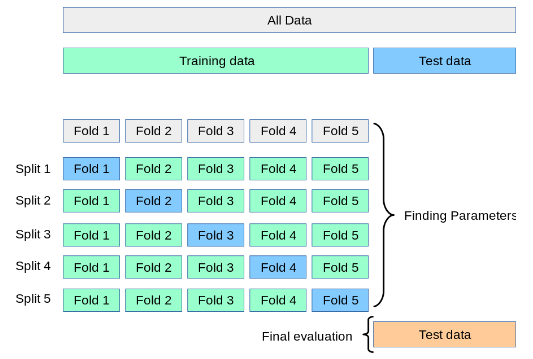

3. Quantify the model performance using a <font color='blue'>model evaluation metric</font>:
    - For <b>regression</b>: RMSE (Root Mean Squared Error), MSE (Mean Squared Error), MAE (Mean Absolute Error).
    - For <b>classification</b>: classification accuracy, confusion matrix, and other tools (to be discussed).

## Method 1 - Use Cross-Validation to Measure <font color='blue'>Classification Accuracy</font>

### Procedure:
Use the <font color='blue'>cross_val_score()</font> function to <u>train, make predictions, and evaluate</u> the <b>sgd_clf</b> estimator on <b>K = 3</b> train/test subsets (splits) and return the accuracy for each of them:<br><br>
(About cross_val_score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)<br>
(About cross validation: https://scikit-learn.org/stable/modules/cross_validation.html)

In [15]:
from sklearn.model_selection import cross_val_score


cls_acc = cross_val_score(sgd_clf,             # the Stochastic Gradient Descent object to be trained
                          X_train,             # training set
                          y_train_5,           # training labels
                          cv=3,                # K (number of subsets)
                          n_jobs=-1,           # Use parallel processing with all CPUs
                          scoring="accuracy")  # returns the accuracy for each fold (also called subset, or split)

print(f"Accuracies for each subset: {cls_acc}")     # array([0.95, 0.96, 0.96])

print(f"Mean accuracy: {cls_acc.mean().round(3)}")  # 0.957

Accuracies for each subset: [0.95 0.96 0.96]
Mean accuracy: 0.957


### Some words about <u>classification accuracy</u>:
- Is the <u>proportion of the correct predictions</u> (number of correct predictions divided by the total number of predictions; in ce masura modelul antrenat a raspuns corect);<br><br>
- <u>Goal</u>: to make the fewest number of mistakes;<br><br>
- <u>Issue with biased datasets</u> (dataseturi dezechilibrate, de exemplu prea putine valori True si prea multe valori False, in cazul clasificarii binare):<br>
   (1) if only a small percent of data are <i>True</i> labels, and <br>
   (2) if our model predicts everything as <i>False</i> (including when the actual values are <i>True</i>) =><br>
   (3) the final accuracy will be very high.<br><br>
   For example, if only 6% of labels are <i>True</i> => 94% are <i>False</i> => the classification accuracy of a "dumb" model that always predicts <i>False</i> will always be 94%!

### Important:
When using <b>accuracy</b>, compare the result with <font color='blue'>Null accuracy</font>: accuracy that could be achieved by always predicting the most frequent class (the % of the most frequent class). The <i>Null Accuracy</i> in the above example is 94%.<br><br>
In our case:<br>
the most frequent class is <i>False</i> because, from a total of 60000 images, <b>y_train_5</b> has 5421 images of 5-s (9%)<br> => only 9% of the dataset is the class of <i>True</i><br>
=> <b>Null accuracy = 91%</b> !!!<br>
=> Our model performed only slightly better than the <b>Null accuracy</b> (if the model would predict all the time <i>False</i>, it would have an accuracy of 91%!).

In [16]:
# How to find the number of instances in a BINARY dataset:
# -------------------------------------------------------

np.count_nonzero(y_train_5)  # 5421;  Counts the number of non-zero values into an array
                             #        https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html
# Or:

# np.sum(y_train_5)          # 5421; True values are considered 1, while False values are considered 0.

# Or:

# np.bincount(y_train_5)  # Returns the CLASS DISTRIBUTION (here, the number of non_5-s and 5-s: 54579, 5421)
#                         # https://numpy.org/doc/stable/reference/generated/numpy.bincount.html


# Total number of instances in the dataset (remember numpy "size"):

# y_train_5.size  # 60000

5421

### Classification accuracy disadvantages:
- Does not tell anything about the <b>underlying distribution of response values</b> (how many are good, how many are bad, how the good/bad predictions are distributed over the two classes, etc.);
- Does not reveal the <b>types of errors</b> made by the model.

Both issues - to be addressed by:
## Method 2 - <font color='blue'>CONFUSION MATRIX</font>
It is a table that quantifies the values predicted by the model in respect to the actual values. It helps to <b>understande the performance</b> of a classifier.
### <u>Procedure</u>:
#### 1. Use the <font color='blue'>cross_val_predict()</font> function to make predictions on the training set => <font color='blue'><b>y_train_pred</b></font>
#### 2. Compare <font color='blue'><b>y_train_5</b></font> (labels) and <font color='blue'><b>y_train_pred</b></font> (predictions) to generate the <font color='blue'>Confusion Matrix</font>
#### 3. Use ***Confusion Matrix*** to compute <font color='blue'>Precision</font>, <font color='blue'>Recall (or Sensitivity)</font>, and the <font color='blue'>F1 score</font>
#### 4. Adjust the <font color='blue'>classification threshold</font> to modify the model's performance (the <font color='blue'>Precision/Recall trade-off</font>)

<br>Let's perform each of the above steps:
### 1. Use the <font color='blue'>cross_val_predict()</font> function to make predictions on the training set.

The function performs K-fold cross validation and returns the predictions on each fold (spre deosebire de `cross_val_score`, care returneaza un indice de performanta (de ex. acuratetea) pentru fiecare fold). <br><br>The array of predicted values will be <font color='blue'>y_train_pred</font>:<br>

In [17]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf,   # object to be trained
                                 X_train,
                                 y_train_5,
                                 n_jobs=-1,
                                 cv=3)      # K = 3 - no. of folds (subsets)

In [18]:
print(y_train_pred[:40])  # Returns one prediction (True or False) for each instance of the training set

print(y_train_5[:40])     # Notice that one True value is predicted as False

[ True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False]
[ True False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False  True False False False False]


### 2. Compare <font color='blue'><b>y_train_5</b></font> and <font color='blue'><b>y_train_pred</b></font> to generate the <font color='blue'>Confusion Matrix</font>:
Compare labels (correct values) with predictions to generate the <b>Confusion Matrix.</b><br><br>
For binary classification (2 classes), the <b> Confusion Matrix</b> is a 2x2 NumPy array. For 10 classes, it would be a 10x10 array.<br><br>
<font color='red'><u><b>Attention!</b></u> In Scikit Learn, the predicted values are on columns, and the actual ones are on rows, starting with the negative (False) class.</font>

[[53892   687]
 [ 1891  3530]]


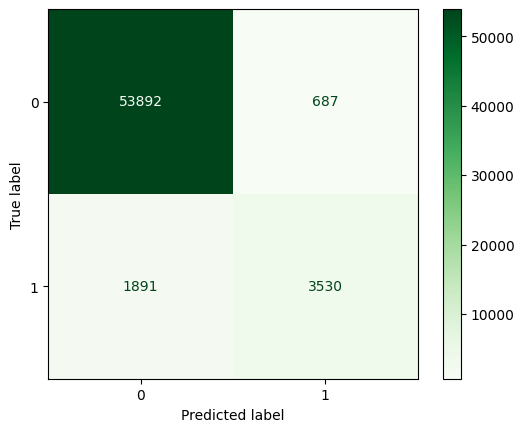

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train_5,     # labels; in SciKit Learn, labels should be the first argument
                      y_train_pred)  # predictions; in SciKit Learn, predictions should be the second argument

print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.show()

# NOTE:
# In Scikit Learn, all metrics functions expect the actual values to be the first argument.
# Otherwise, the actual values will be on columns, and the predicted ones - on rows.

### About the Confusion Matrix:
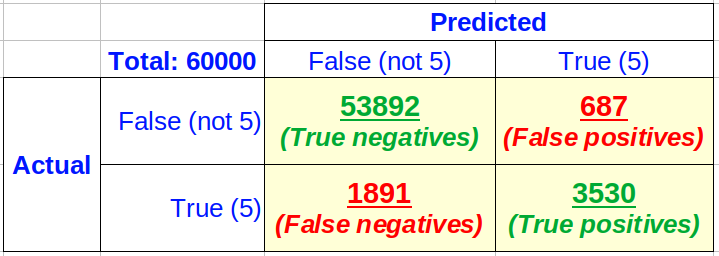
#### Pay attention:
This arangement of rows and columns is NOT universal! It depends on the order of arguments when you call the confusion matrix function, and on the ML library that you are using.

#### Notes:
- About 0.15% of the errors - due to mislabeling of the MNIST dataset (see MIT study: https://venturebeat.com/2021/03/28/mit-study-finds-systematic-labeling-errors-in-popular-ai-benchmark-datasets/)
- <b>False positives</b> - also called <font color='blue'><b>Type I error</b></font>
- <b>False negatives</b> - also called <font color='blue'><b>Type II error</b></font>

### 3. Compute <font color='blue'>Precision</font>, <font color='blue'>Recall</font>, and the <font color='blue'>F1 score</font>
#### Based on Confusion Matrix, the following <u>performance metrics</u> (indici de performanta) can be computed:
- <font color='blue'><b>Classification accuracy</b></font> - Same as defined above (Method 1) (how often is the classifier correct), but calculated using the confusion matrix: (53892+3530)/60000 = 0.957 => it detects the correct class in 95.7% of the cases;<br><br>
- <font color='blue'><b>Classification error</b></font> - how often is the classifier incorrect: <b>1 - Classification accuracy</b>; (1 - 0.957 = 0.043, adica 4.3%);<br><br>
- <font color='blue'><b>Precision</b></font> - accuracy of the positive predictions: 3530/(3530+687) = 0.837 => when it predicts that an image is 5, it is right in 83.7% of the cases; It shows <b>how well you guess <i>True</i></b> (<i>True</i> is <u>the label you are interested in</u>); <i>False</i> labels are left "out of the picture" (or: how much trust do I have in *True* predictions);<br><br>
- <font color='blue'><b>Recall</b></font> (also called <font color='blue'><b>sensitivity</b></font>, or <font color='blue'><b>True Positive Rate/TPR</b></font>) - from the total no. of 5s, what proportion was correctly identified: 3530/(3530+1891) = 0.6512 => it detects only 65% of the 5s => 35% of 5s will be <u>confused</u> with other digits; This is a parameter that should be <b>maximized</b>;<br><br>
- <font color='blue'><b>Specificity</b></font> (also called <font color='blue'><b>True Negative Rate/TNR</b></font>) - from the total no. of non-5s (False examples), what proportion was correctly identified: 53892/(53892+687) = 0.987 => 98.7% of the non-5s are correctly identified as not being 5s; This is a parameter that should be <b>maximized</b>;<br><br>
- <font color='blue'><b>False Positive Rate/FPR</b></font> - from the total no. of non-5s (False examples), what proportion was incorrectly detected as 5s: 687/(53892+687) = 0.0126 = 1-TNR => 1.26% of non-5s were declared as 5s; (alt exemplu: din numarul total de pacienti sanatosi, care este proportia celor incorect diagnosticati ca fiind bolnavi);<br><br>
- <font color='blue'><b>F1 score</b></font> - it is high for high values of precision and recall; favours classifiers with similar precision and recall (to be discussed later in more detail);<br><br>
- <font color='blue'><b>Precission/Recall trade-off</b></font> - increasing precision decreases recall, and conversely (to be discussed later).<br><br>

**Observatii:**
- Acuratetea este folosită atunci când True Positives și True Negatives sunt mai importante, în timp ce scorul F1 este folosit atunci când False Negatives și False Positives sunt importante;
- Acuratetea poate fi utilizată atunci când clasele sunt echilibrate ca numar de exemplare, în timp ce scorul F1 este preferat atunci când o exemplele dintr-o clasa sunt semnificativ mai numeroase decât cele din cealaltă clasă.

<u>An illustrated confusion matrix</u>:<br>
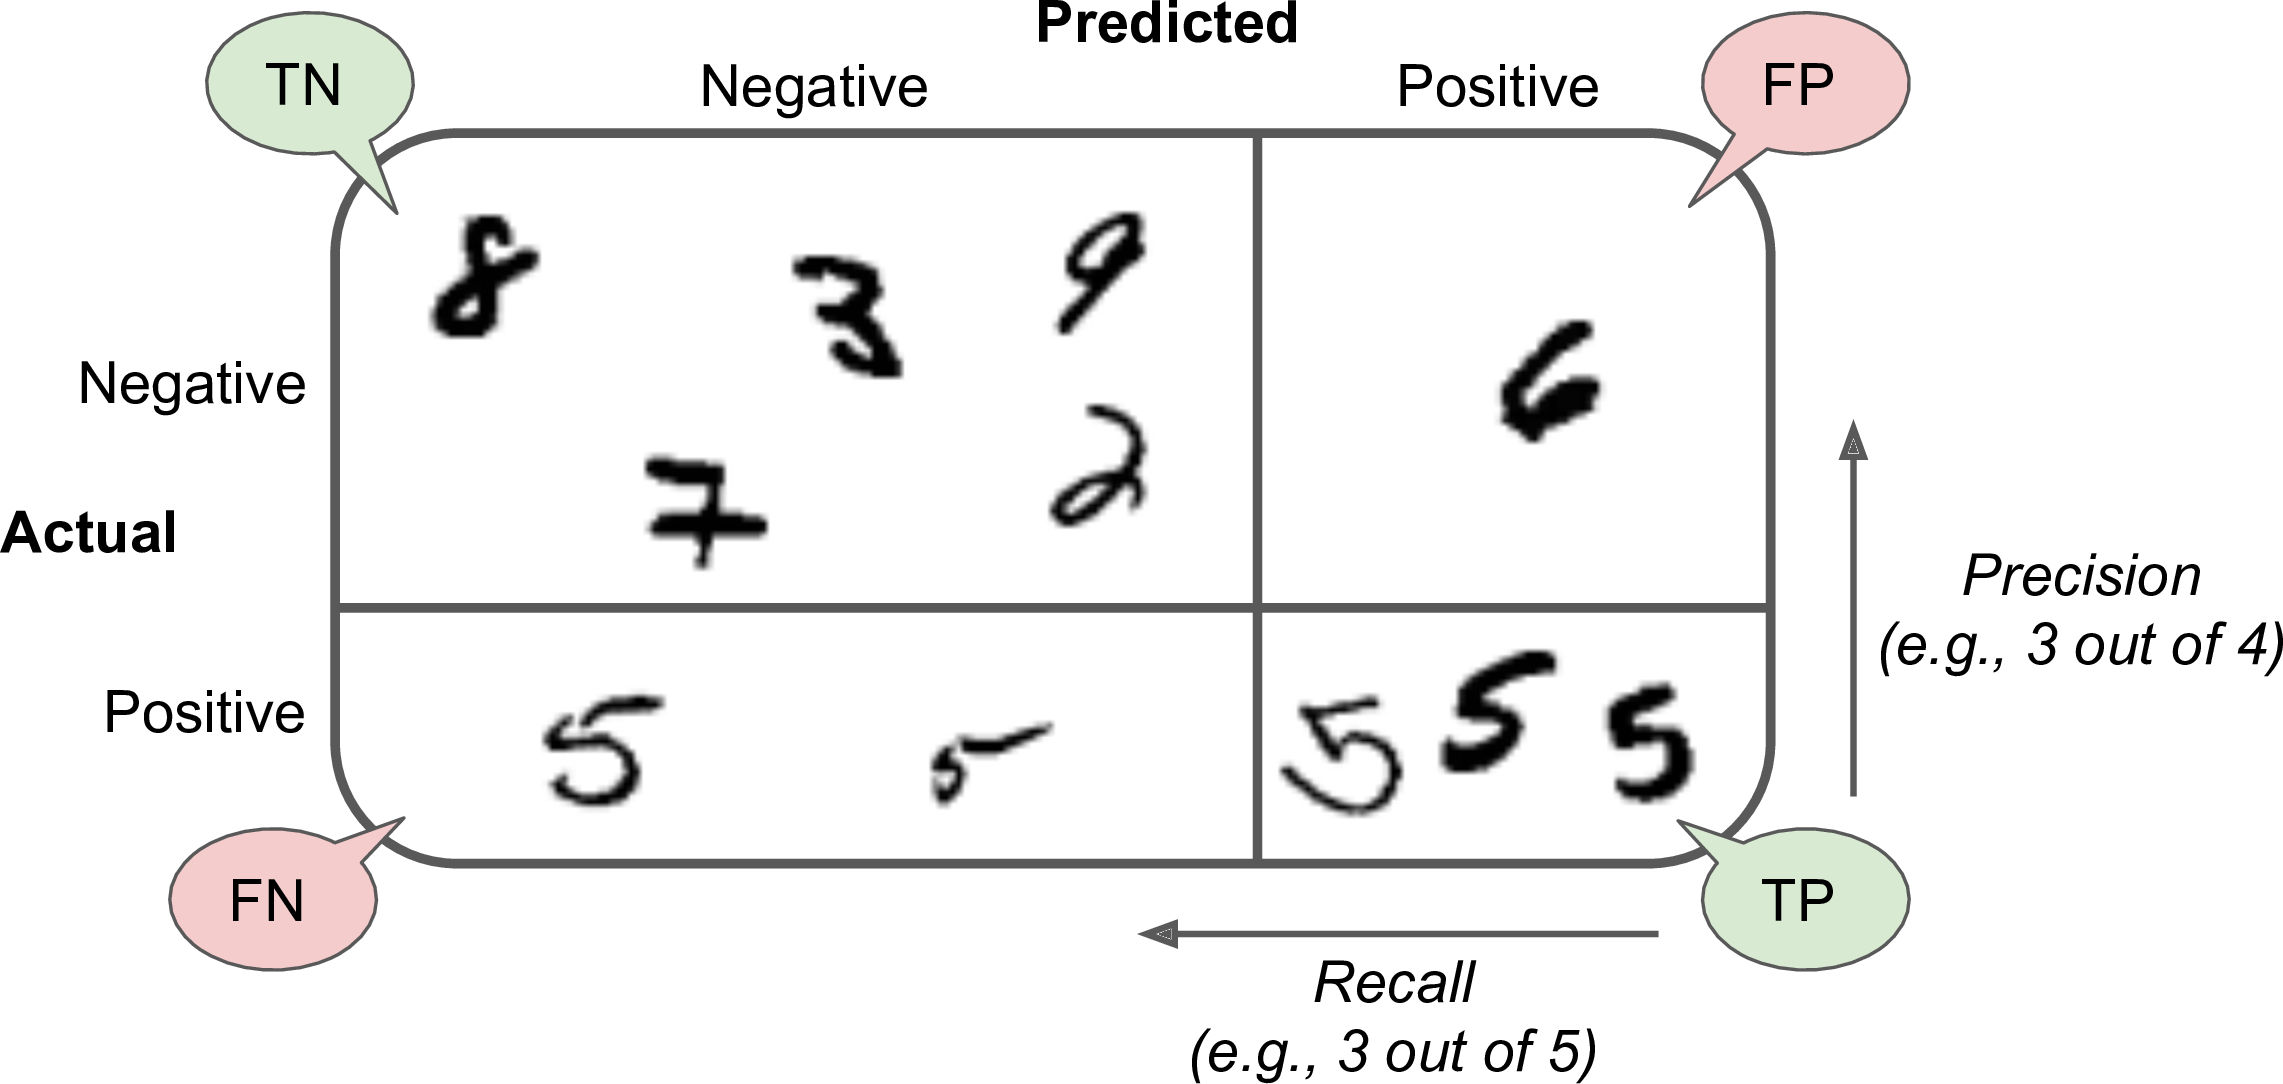

In [20]:
# Compute some of the above metrics:
# ---------------------------------

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Indicii de performanta importati mai sus primesc doi parametri: etichetele si predictiile;
# De exemplu, f1_score(etichete, predictii)


print("Classification Accuracy: ", accuracy_score(y_train_5, y_train_pred).round(3))  # (53892+3530)/60000

print("Precision: ", precision_score(y_train_5, y_train_pred).round(3))               # 3530/(3530+687)
# => When the model claims an image is 5, it is correct only 83.7% of the time!

print("Recall (sensitivity): ", recall_score(y_train_5, y_train_pred).round(3))       # 3530/(3530+1891)
# The model detects only 65.1% of the 5-s!!

print("Specificity: ", (cm[0,0]/(cm[0,0]+cm[0,1])).round(3))                          # 53892/(53892+687)

print("F1 score: ", f1_score(y_train_5, y_train_pred).round(3))

Classification Accuracy:  0.957
Precision:  0.837
Recall (sensitivity):  0.651
Specificity:  0.987
F1 score:  0.733


#### The <font color='blue'>F1 score</font>:
- combines precision and recall into a single metric;
- it offers a simple way to compare two classifiers;
- it is the <font color='blue'>harmonic mean</font> of precision and recall => the classifier will get a high F1 score if recall and precision are both high:<br>
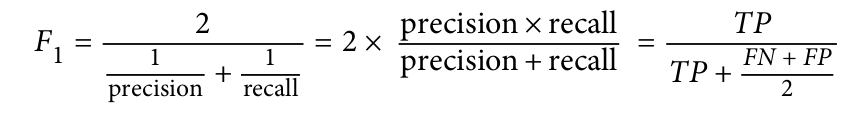

### What metric to choose in order to evaluate the clasifier performance
It depends on the "business". For example:
- in case of a <u>spam filter</u> (positive class (True) is <i>spam</i>): <b>optimize for precision or specificity</b>, because it is more acceptable to have false negatives (spam mail goes to the inbox) than false positives (non-spam email goes to the spam folder);
    - optimizarea preciziei: majoritatea mailurilor declarate spam sunt cu adevarat spam, insa in detrimentul sensibilitatii (un numar mai mare de mailuri de tip spam nu sunt detectate si ajung in inbox);
    - optimizarea specificitatii: sistemul detecteaza majoritatea mailurilor non-spam;<br><br>
- in case of banking, when detecting <u>fraudulent transactions</u> (positive class is "fraud"): <b>optimize for sensitivity (recall)</b>, because it is more acceptable to have false positives (normal transactions flagged as potential fraud) than false negatives (not detecting frauds). Explicatie: sensibilitatea mare (sunt detectate majoritatea tranzactiilor frauduloase) se face cu pretul unei precizii mai reduse (cand sistemul "spune" ca o tranzactie este frauduloasa, are dreptate intr-o mai mica masura, deci ceva mai multe tranzactii corecte sunt clasificate ca frauduloase).

### 4. Adjust the <font color='blue'>classification threshold</font> (baremul de clasificare) to modify the model's performance (the <font color='blue'>Precision/Recall trade-off</font>)
#### How the SGDClassifier works:
a) for each instance, it computes a <b>score</b> based on a <i>decision function</i>, showing the chances of an instance to be <i>True</i> (sansa sa reprezinte cifra 5); in the figure below, images are ranked by their classifier scores;<br><br>
b) instances with scores greater than a threshold are assigned to the positive <i>True</i> class; otherwise - to the negative (<i>False</i> class);<br><br>
c) if the threshold is changed: a <b>higher threshold</b> => <b>higher specificity</b> and (in general) <b>precision</b>, but <b>lower recall</b>, and vice-versa;<br><br>
Figure below shows how precision and recall are changing for 3 different thresholds.<br>
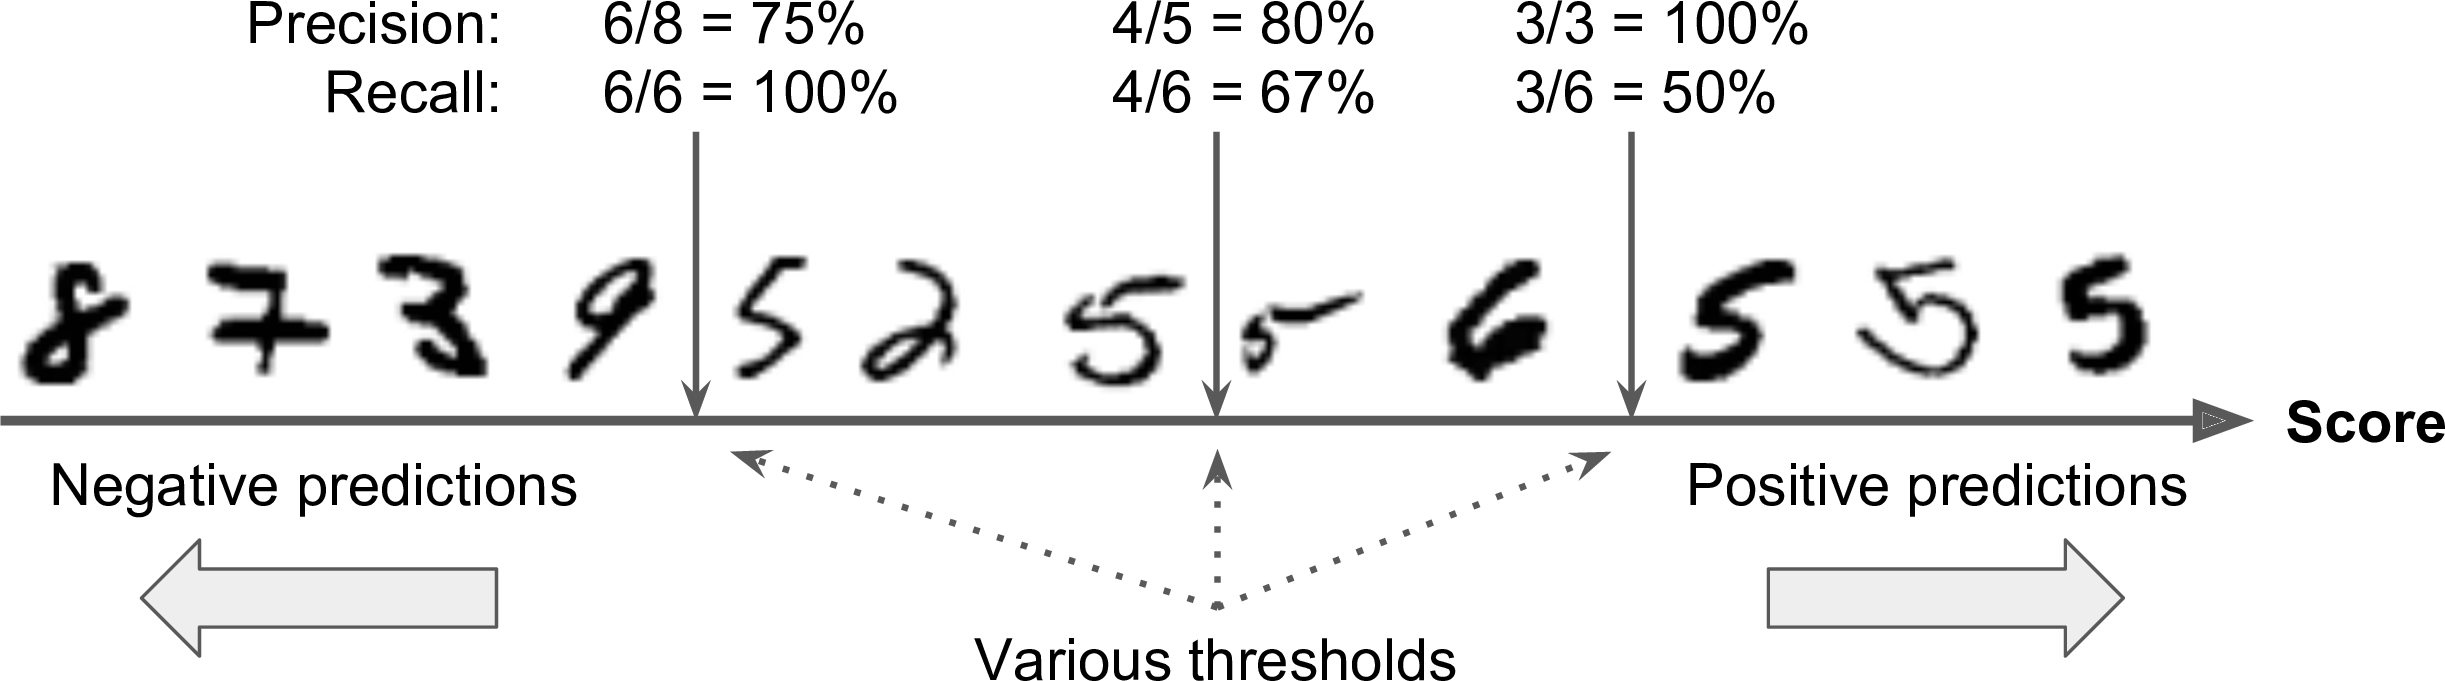

#### Some conclusions:
- For binary problems, the default value of threshold is 0.5;
- Adjust the threshold down to increase sensitivity, or up to increase precision;
- Sensitivity and precision have an inverse relationship: increasing one will decrease the other;
- Adjusting the threshold - one of the last steps to be taken (should be performed <b>after</b> building different models and selecting the best one).

In Scikit-Learn, the threshold can’t be changed directly. However, we can access the decision scores that are uses to make predictions: call the classifier’s decision_function() method to return a score for each instance, then make predictions based on those scores using any threshold you want.<br><br>
***Procedure:***
1. Compute the vector of decision scores using <i>cross_val_predict()</i> (vector ***y_scores***);
2. Based on the decision scores, use <i>precision_recall_curve()</i> to compute precisions, recalls, and thresholds;
3. Plot precision and recall as functions of threshold, and/or precision vs. recall (to visually decide which threshold to use);
4. Chose the desired precision, for example 0.9, then find the first threshold that corresponds to the first precision >= 0.9:
   - 4.1. Find the index of the first precision that is >= 0.9;
   - 4.2. Using the above index, find the first threshold that corresponds to the first precision >= 0.9;
5. Based onto the scores vector (***y_scores***), create a new vector of <i>True</i> and <i>False</i>: every value up to the above identified threshold is <i>False</i>; everything above the threshold is <i>True</i>;
6. Now, that the threshold was set for a 90% precision, re-compute recall and check precision.

In [21]:
# Precision/recall trade-off; example for the entire training set

# 1. Compute the decision scores (vector y_scores):

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3,
                             n_jobs=-1,
                             method="decision_function")   # returns decision scores instead of predictions

In [22]:
print(y_scores.round(0))  # Vector of scores, for each of the 60,000 images from the training set

[  1201. -26884. -33072. -15920. -20004. -16653. -14277. -23328.  -5173. -13874. -22113.  -2316. -29304. -18276.  -6791. -16925. -24590. -18278.  -6028. -22382. -49310. -17839. -18791. -17252. -15736. -26565.  -7331. -29867. -55517. -23394. -23749. -38674.  -9727. -31510. -26321.   2128. -17549. -30196. -27894. -12411. -16151. -20215.  -7709. -13619. -11099. -18165. -16223.   7218.  -2050. -19307. -10577. -21488. -30355. -10378. -10628. -23912. -31708. -16706. -24310. -13786. ... -15365. -12943. -11449. -11238. -17140.   5194. -16476.   1153.    752.  -5759. -17479. -16376. -33552. -28398.
 -24017. -10746.   7206.  -3759. -14938. -36505.   2490. -17878.  -9219. -24044. -23182. -32431. -23173. -20817.   9479.   -484. -46038. -43152. -19429. -21419. -34190. -32863. -13898.  -6167. -14191. -19252.  -5285. -17930. -24015. -44123. -27093. -45570. -15746. -22907. -25004. -12758. -23486. -19137.  -8610.   7949. -10904. -22415. -32536.  13272.  -7258. -16878.]


In [23]:

# 2. Based on the above scores (vector y_scores), compute precisions, recalls, and thresholds:


from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)  # returns 3 numpy arrays

print(thresholds.size, '; ', precisions.size)  # returns 60000 and 60001; the next cell explains why sizes
                                               # are different.

# To have a better view on the results, create a DataFrame with these 3 numpy arrays
# (create 3 Pandas Series and concatenate them in a single DataFrame):

s1 = pd.Series(precisions[:-1], name="Precisions")  # see in the next cell why [:-1]

s2 = pd.Series(recalls[:-1], name="Recalls")

s3 = pd.Series(thresholds, name="Thresholds")

df = pd.concat([s1, s2, s3], axis=1)

# Or, create the DataFrame in one line of code, using a dictionary:
# df = pd.DataFrame({"Precisions":precisions[:-1], "Recalls":recalls[:-1], "Thresholds":thresholds})

df.tail(20).round(7)

# Notice that first precisions start at about 9%.

# Experiment with different records from the DataFrame; e.g. print(precision[55000],...) etc.
# or use df.sample(30) instead of df.head(30) or df.tail(30)

60000 ;  60001


,Precisions,Recalls,Thresholds
59980,0.850000,0.003136,30919.239887
59981,0.842105,0.002952,31131.710830
59982,0.833333,0.002767,31196.629751
59983,0.823529,0.002583,31491.567796
59984,0.812500,0.002398,31839.587325
59985,0.866667,0.002398,31847.887269
59986,0.857143,0.002214,32149.324075
59987,0.846154,0.002029,32447.667960
59988,0.833333,0.001845,33498.675602
59989,0.818182,0.001660,33976.830625


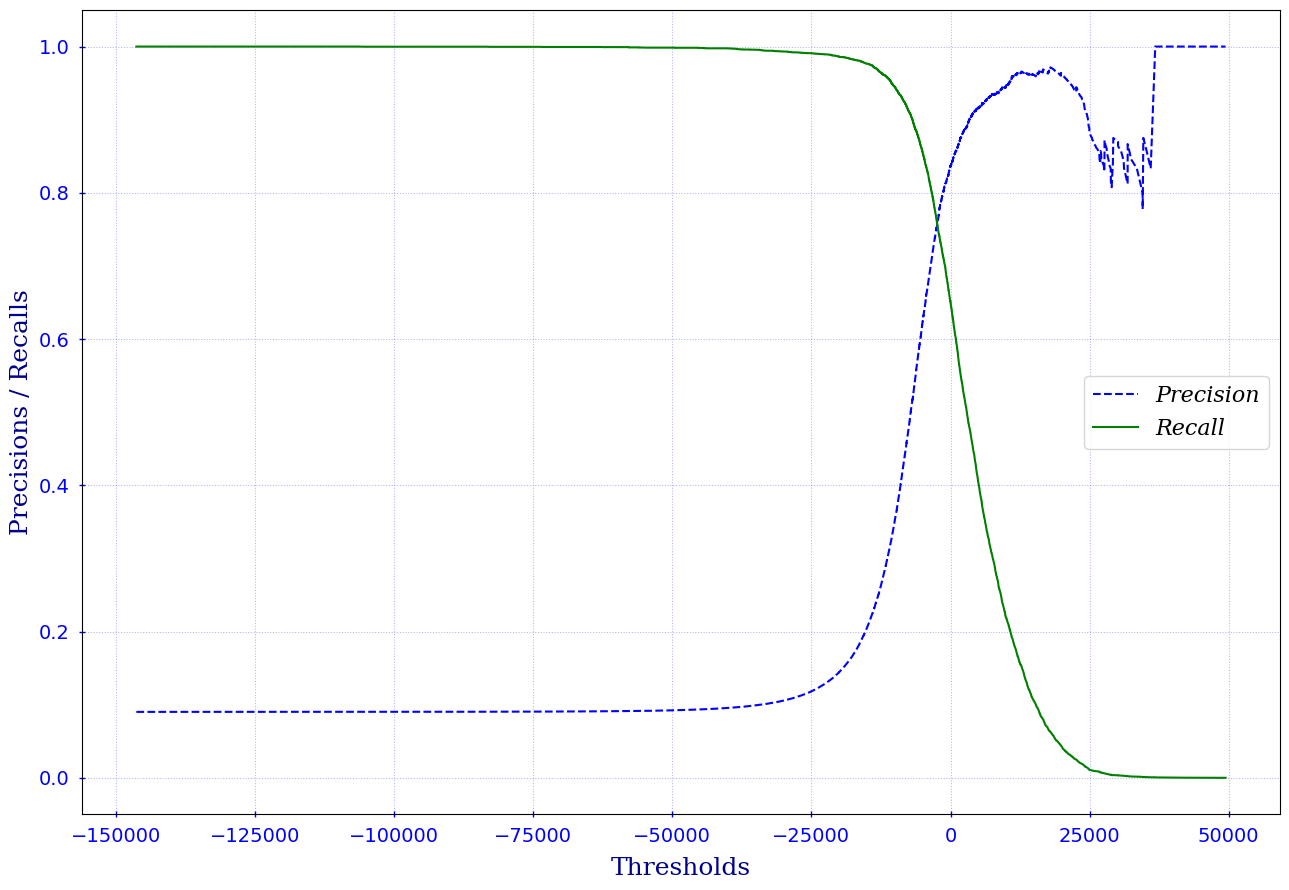

In [24]:
# 3. Plot precision and recall as functions of threshold:

%matplotlib inline
# %matplotlib notebook
# %matplotlib ipympl

import matplotlib.pyplot as plt


# Please pay attention:
# --------------------
# According to official documentation: "The last precision and recall values are 1. and 0. respectively and do not
# have a corresponding threshold. This ensures that the graph starts on the y axis."
# Explicatie:
  # Un barem trebuie sa se afle intre 2 scoruri, cu exceptia primului barem care poate sa nu aiba niciun scor
  # in stanga => dupa ultimul barem trebuie sa mai urmeze un scor (baremul nu poate fi dupa ultimul scor)
  # => thresholds are cu un element mai putin decat numarul de scoruri, deci si decat precisions si recalls
  # => la plotare, pe axa oy se va lua cu un element mai putin (eg. precisions[:-1] omite ultima precizie)


plt.subplots(figsize=(13, 9))

plt.xlabel('Thresholds', labelpad=8, color='darkblue', name='serif', size=18)

plt.ylabel('Precisions / Recalls', color='darkblue', name='serif', size=18)

plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')

plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plt.tick_params(axis="both",   # or 'x', 'y', 'both'
                which='major', # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='inout',     # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b', labelsize=14,
                pad=7)          # Distance from tick to label (in points)

plt.grid(which='both',  # 'both', 'minor', 'major' (default)
         axis='both',   # 'both', 'x', 'y'
         color='b', alpha=0.3, linestyle=':', linewidth=0.75)

plt.tight_layout()

plt.legend(loc='center right',
           prop=dict(family='serif',
                     style='italic',
                     size=16)
          )
plt.show()

Notice that the precision curve is more irregular than the recall one. This is because sometimes precision may go down when the threshold is raised. For example, look at the following figure:<br>
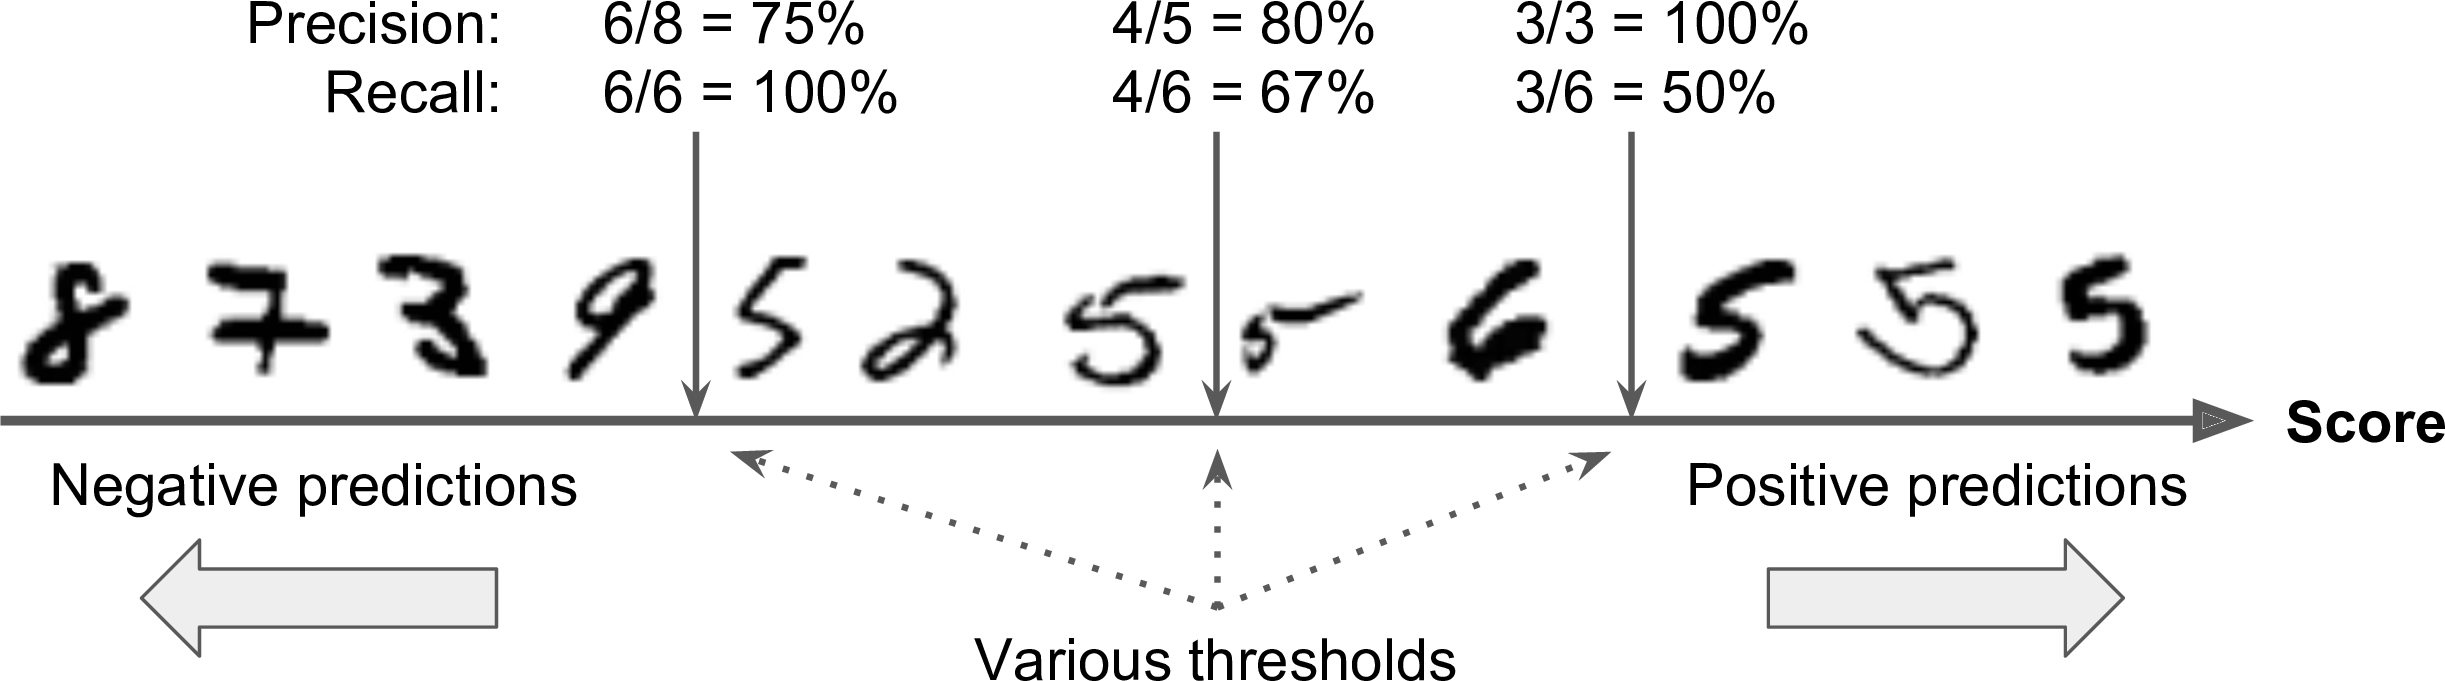
<br>Notice what happens when you move the central threshold just one digit to the right: instead of going up, precision decreases from 4/5 (80%) down to 3/4 (75%). On the other hand, recall will only decrease when the threshold is increased, which explains why its curve is smooth.

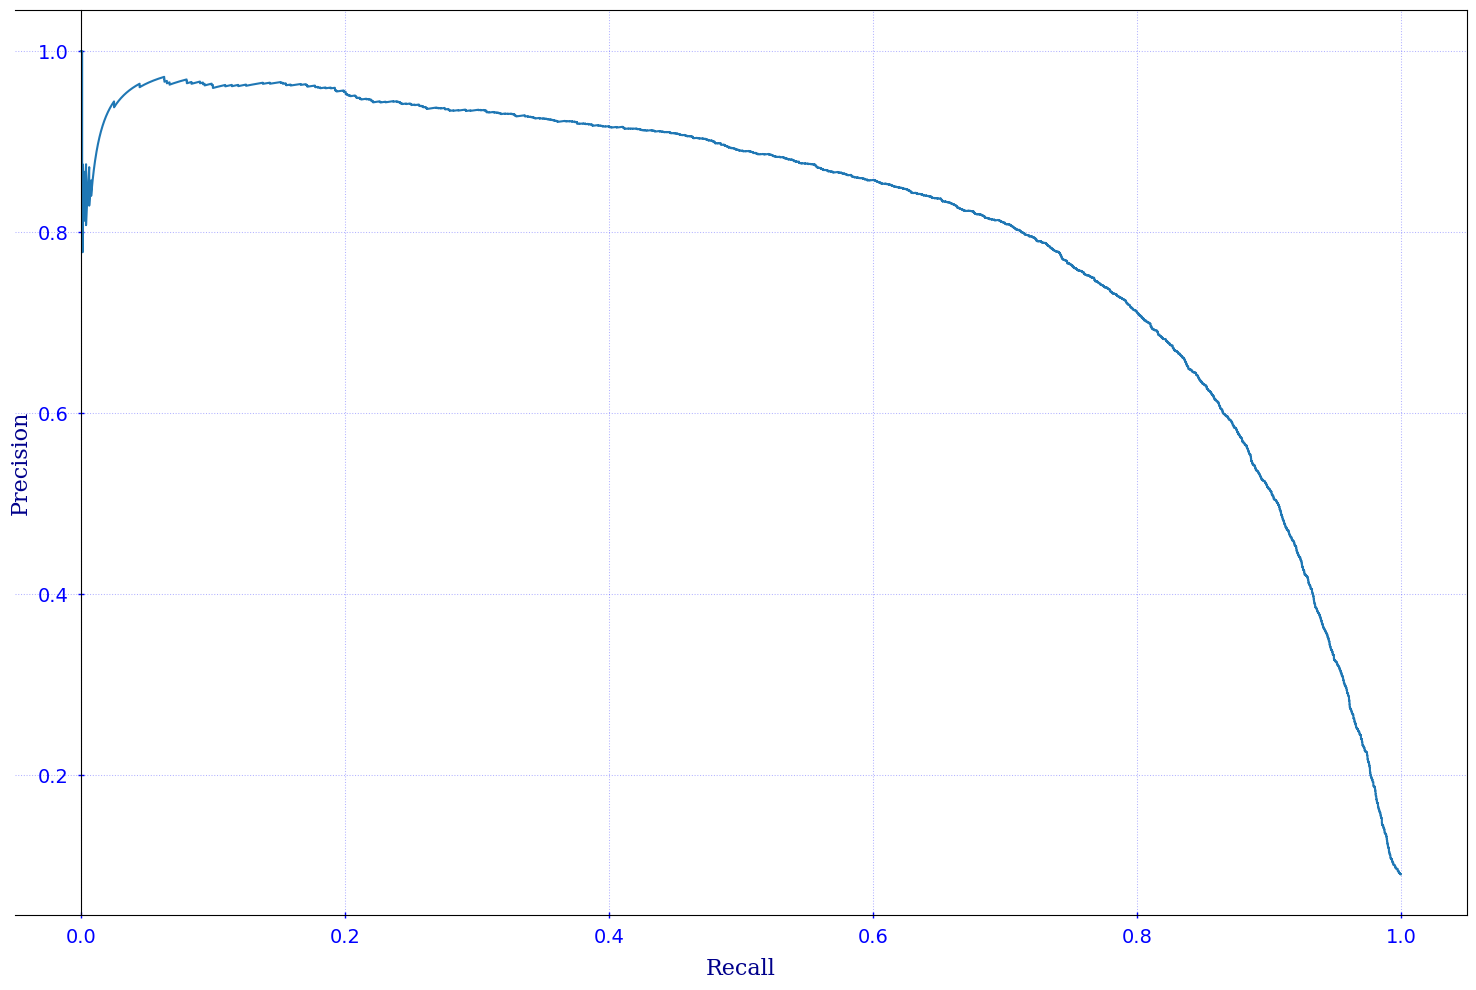

In [25]:
# 3. Another way to visually select a good precision/recall trade-off is to plot
#    precision and recall against each other:

plt.subplots(figsize=(15, 10))

plt.xlabel("Recall", labelpad=8, color='darkblue', name='serif', size=16)

plt.ylabel("Precision", color='darkblue', name='serif', size=16)

plt.plot(recalls, precisions)

plt.tick_params(axis="both",    # or 'x', 'y', 'both'
                which='major',  # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='inout',     # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b', labelsize=14,
                pad=7)                # Distance from tick to label (in points)


'Place the left and bottom spines to x=0 and y=0, respectively:'

ax = plt.gca()  # gca (get current axes) - returns the current subplot

ax.spines['left'].set_position(('data', 0))    # Alternatively:

plt.grid(which='both',  # 'both', 'minor', 'major' (default)
         axis='both',   # 'both', 'x', 'y'
         color='b',
         alpha=0.3,
         linestyle=':',
         linewidth=0.75)

plt.tight_layout()

plt.show()

Notice that precision starts to fall sharply at around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop. This choice depends on your project. So:

4. Chose the desired precision, for example 0.9, then find the first threshold that corresponds to the first precision >= 0.9:
   - 4.1. Find the index of the threshold that gives a certain precision (for eg. 90% precision);
   - 4.2. Using the above index, find the first threshold that corresponds to the first precision >= 0.9;


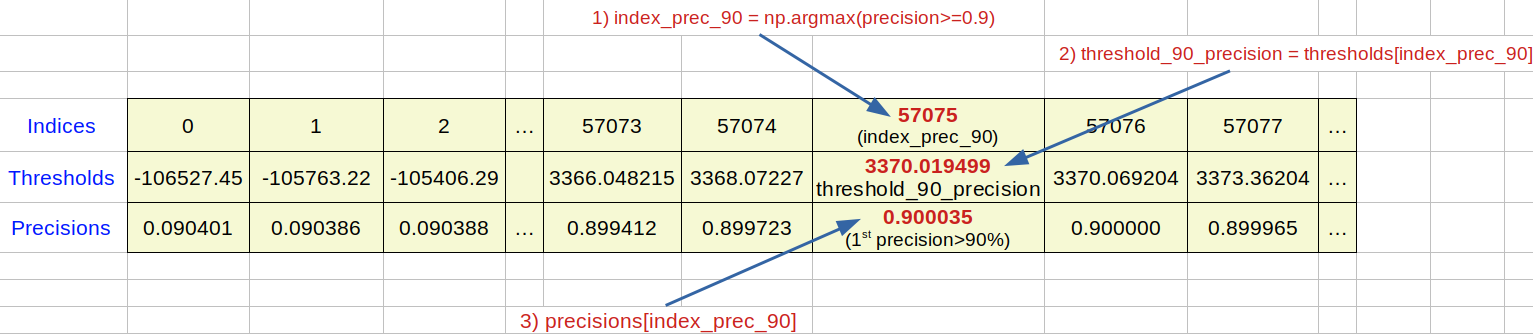

In [26]:
# 4. Find the first threshold that corresponds to the first precision >= 0.9:

#    4.1. Find the index of the first precision that is >= 0.9

index_prec_90 = np.argmax(precisions>=0.9)                  # 57075: the index of the first precision >= 0.9

print('Index of the 1-st precision >=90: ', index_prec_90)  # 57075

# If you want to see the precision from the above index:
print('The 1-st precision >=90: ', precisions[index_prec_90].round(6))  # 0.900034

# --------------------------------------------------------------------------------------------------------------

#    4.2. Using the above index, find the first threshold that corresponds to the first precision >= 0.9:

threshold_90_precision = thresholds[index_prec_90]

print('Threshold corresponding to the 1-st precision >=90: ', threshold_90_precision.round(5), '\n')  # 3370

# Check the DataFrame to see if, indeed, at index 57075, precision becomes greater than 0.9:

print(df.iloc[57070:57080].round(7))  # "iloc" comes from "index location"

Index of the 1-st precision >=90:  57109
The 1-st precision >=90:  0.900035
Threshold corresponding to the 1-st precision >=90:  3370.0195 

       Precisions   Recalls   Thresholds
57070    0.897270  0.484966  3242.359964
57071    0.897576  0.484966  3242.854385
57072    0.897541  0.484781  3246.466052
57073    0.897848  0.484781  3250.559819
57074    0.898154  0.484781  3251.932056
57075    0.898120  0.484597  3257.875360
57076    0.898085  0.484413  3262.261620
57077    0.898050  0.484228  3267.179928
57078    0.898015  0.484044  3268.528639
57079    0.897980  0.483859  3271.233375


In [27]:
# NOTE: alternatively, points 4.1 and 4.2 from above can be solved using a single line:

threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

In [28]:
# 5. Based onto the vector of scores (y_scores), create a new vector of True and False: every image with a score
#    lower than threshold_90_precision (which is 3370.019) is False (is not considered to be 5);
#    every image with a score above the threshold_90_precision is True.

# Let's call this vector y_train_pred_90:

y_train_pred_90 = (y_scores >= threshold_90_precision)

print(y_train_pred_90[45:49])  # This range includes a figure representing 5, given a prediction > 90%;
                               # returns [False False True False]

# Short problem:
# Compare the number of predicted True values with the number of True values from the labels vector (y_train_5)
# Clue: you can use the numpy sum() function

[False False  True False]


In [29]:
# 6. Now, that the threshold was set to 90%, re-compute recall and check precision:

rec_score = recall_score(y_train_5, y_train_pred_90)

prec_score = precision_score(y_train_5, y_train_pred_90)

print("Precision_score: ", prec_score)
print("Recall_score: ", rec_score)

Precision_score:  0.9000345901072293
Recall_score:  0.4799852425751706


### To summarize the above procedure, <u>for binary classification</u>:
1. Make predictions on the training set: use the <i><b>cross_val_predict()</b></i> function (performs k-fold cross validation & returns predictions):

In [30]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

2. Use the above vector <i><b>y_train_pred</b></i> to compute the <i>confusion matrix</i>:

In [31]:
cm = confusion_matrix(y_train_5, y_train_pred)

3. Compute <i>precision</i>, <i>recall (sensitivity)</i>, and <i>F1-score</i>, analyze their values, and draw conclusions:

In [32]:
precision_score(y_train_5, y_train_pred)

recall_score(y_train_5, y_train_pred)

# f1_score(y_train_5, y_train_pred)

0.6511713705958311

#### Starting from this point, the steps on changing the threshold are presented.
4. Compute the <font color='blue'>decision scores</font>:<br>
<u>Note</u>: scores are fixed, but precisions and recalls depend on the value of the threshold.<br>
A score is a mark given by the algorithm to each figure; if the score is greater than a threshold => the instance is assigned to the positive class.

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

5. Compute precisions and recalls, for all possible thresholds:

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

6. Analize the following plots in order to visually select the threshold that gives the best <font color='blue'>precision/recall trade-off</font>:
    - <i>precision</i> and <i>recall</i> as functions of threshold;
    - <i>precision</i> as a function of <i>recall</i>.<br>

Suppose you decided to have a precision of 0.9 (90%). Then:<br>

7. Find the first threshold that corresponds to the first precision >= 0.9; let's call it <i><b>threshold_90_precision</b></i>:

In [35]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

8. Based on the vector of scores (<b>y_scores</b>), create a new vector (<b>y_train_pred_90</b>) of <i>True</i> and <i>False</i>; every value up to <i><b>threshold_90_precision</b></i> is <i>False</i>; everything above this threshold is <i>True</i>.

In [36]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

9. Compute <i>recall</i> and check <i>precision</i> for this new threshold:

In [37]:
rec_score = recall_score(y_train_5, y_train_pred_90)
prec_score = precision_score(y_train_5, y_train_pred_90)

In [38]:
print(rec_score.round(2))
print(prec_score.round(2))

0.48
0.9


### 5. More tools for performance analysis
<u>Notice that</u> this classifier has a precision of 90%, but recall is very low (a small number from the total instances of actual 5-s is detected) => the model is not very useful. If you are asked to develop a model with 95% precision, then ask: "At what recall?"
### <font color='blue'>The ROC Curve (Receiver Operating Characteristic)</font>
#### Remember that:
- <font color='blue'><b>Recall</b></font> (also called <font color='blue'><b>sensitivity</b></font>, or <font color='blue'><b>True Positive Rate/TPR</b></font>) - from the total no. of actual 5s, what proportion was <u>correctly identified</u>: 3530/(3530+1891) = 0.6512 => it detects only 65% of the 5s => 35% of 5s will be <u>confused</u> with other digits; this is a parameter that should be <b>maximized</b>;<br><br>
- <font color='blue'><b>Specificity</b></font> (also called <font color='blue'><b>True Negative Rate/TNR</b></font>) - from the total no. of non-5s, what proportion was correctly identified: 53892/(53892+687) = 0.987 => 98.7% of the non-5s are correctly identified as not being 5s; this is a parameter that should be <b>maximized</b>;<br><br>
- <font color='blue'><b>False Positive Rate/FPR</b></font> (rata predictiilor fals-pozitive) - from the total no. of actual non-5s, what proportion was <u>incorrectly detected</u> as 5-s: 687/(53892+687) = 0.0126 = 1-TNR => 1.26% of non-5s were declared as 5s; this is a parameter that should be <b>minimized</b>. <u>OR</u>: proportion of non-5s confused with 5s.<br>
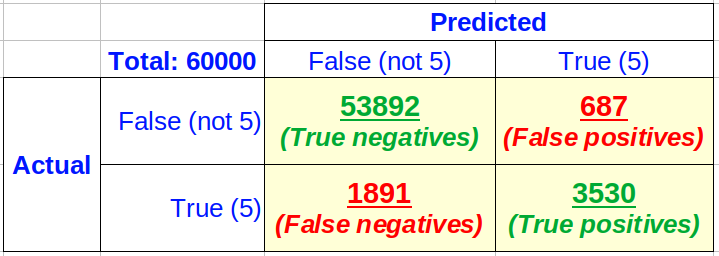<br>

The <font color='blue'><b>ROC Curve</b></font>:
- Very common tool when working with <u>binary classifiers</u>;<br><br>
- It plots <i><b>Recall</b></i> vs. <i><b>False Positive Rate (FPR)</b></i> (which is <i><b>1 - Specificity</b></i>); in our example, this means that it plots the proportion of correctly identified 5-s (which should be as large as possible) vs. the proportion of incorrectly identified 5-s (which should be as low as possible);<br><br>
- Can be used to see how sensitivity (recall) and specificity are affected by various thresholds, without actually changing the threshold;<br><br>
- The <i><b>roc_curve()</b></i> function returns three objects: <i>FPR</i>, <i>TPR</i> (<i>recall</i>, or <i>sensitivity</i>), and all possible <i>thresholds</i>;

#### 5.1 Use the <i>roc_curve()</i> function to compute FPR, recall (TPR) and thresholds:

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)  # FPR = 1 - TNR = 1 - specificity

#### 5.2 Plot the ROC Curve:

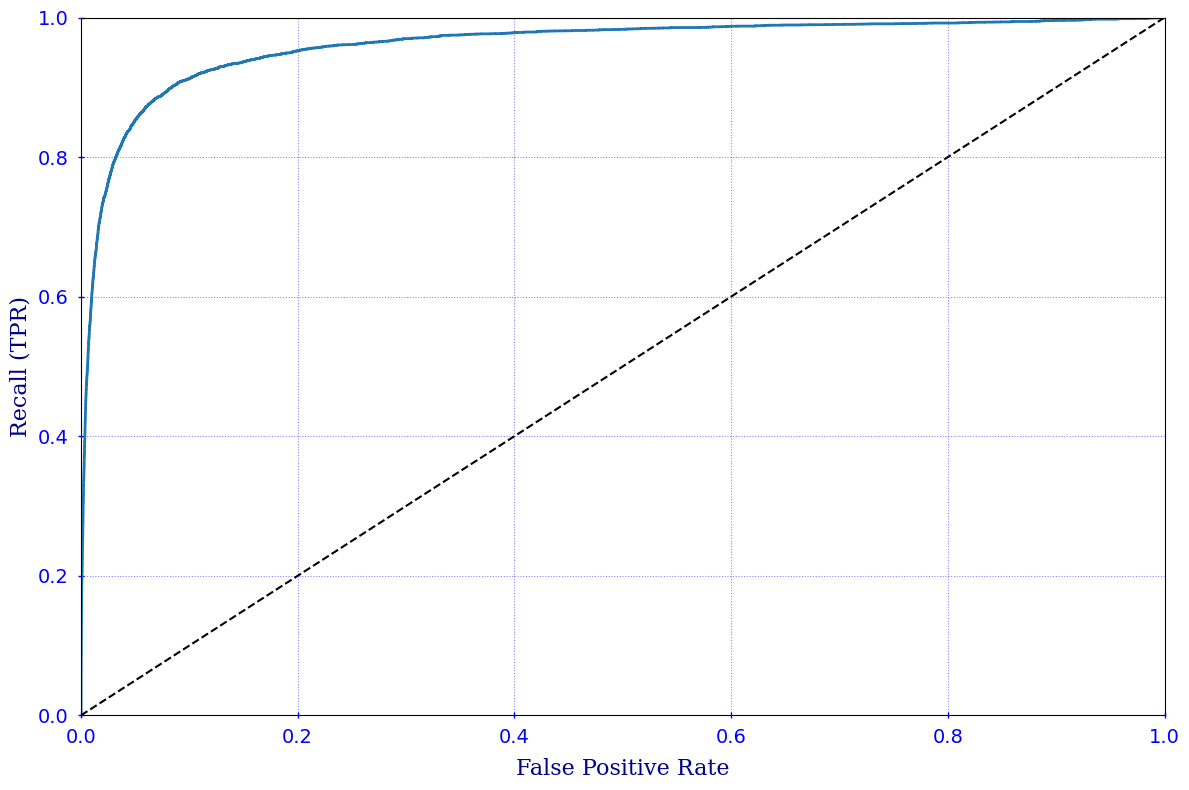

In [40]:

plt.subplots(figsize=(12, 8))     # Define the size of the plot

plt.plot(fpr, tpr, linewidth=2)   # Plt FPR vs. TPR, using a line with width = 2 points

plt.plot([0, 1], [0, 1], 'k--')   # Plot a black, dashed line, from the origin (0, 0) to (1, 1)


# Set the text and font properties for ox and 0y axes:

plt.xlabel("False Positive Rate",labelpad=8, color='darkblue', name='serif', size=16)
plt.ylabel("Recall (TPR)", color='darkblue', name='serif', size=16)


# Set the properties of tick-marks on both axes:

plt.tick_params(axis="both",    # other options besides 'both': 'x', 'y'
                which='major',  # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='inout',             # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b', labelsize=14,
                pad=7)                         # Distance from tick to label (in points)

plt.axis([0, 1, 0, 1])  # ox and oy axes from 0 to 1

# Place the left spine (oy axis) to x=0 and y=0, respectively:

ax = plt.gca()                                 # gca (get current axes) - returns the current subplot
                                               # (necessary to set the position of the oy axis)

ax.spines['left'].set_position(('data', 0))    # Set the position of oy axis ('left' axis) on (0, 0)
                                               # ('data' to be ploted on ox is FPR and starts from 0)

ax.spines['bottom'].set_position(('data', 0))  # Set the position of ox axis on (0, 0)

plt.grid(which='both',                         # 'both', 'minor', 'major' (default)
         axis='both',                          # 'both', 'x', 'y'
         color='b', alpha=0.5, linestyle=':', linewidth=0.75) # Properties of gridlines

plt.tight_layout()  # Automatically fits the plot within the limits of the figure 
plt.show()

#### The dotted line: the ROC Curve of a purely random classifier (a classifier that produces absolutely random results)
In the figure below, a <u>perfect classifier</u> never confuses the image of a number other than 5 with the number 5 (FPR = 0), and always identifies all the images of 5 from our dataset (Recall = 100%)! 
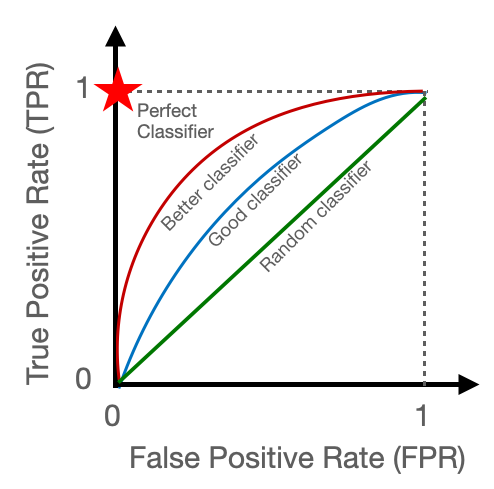
#### Some conclusions:
- The model produces <u>more false positives</u> (high FPR) <u>as the recall (TPR) increases</u> (when sensitivity increases, the number of images confused with 5 increases);
- A good classifier is <b>as far away as possible</b> from the dotted line;
- One can't see the thresholds used to generate the curve.

### <font color='blue'> AUC (Area Under the Curve)</font><br>
<b>ROC curve</b>: useful to compare various classifiers, by measuring the area under the curve.<br>
For a <u>perfect classifier</u>: AUC = 1;<br>
For a <u>purely random classifier</u>: AUC = 0.5<br>

#### How to select when to use the precision/recall (PR) curve or the ROC curve:
- if the positive (True) class is rare: use the PR curve;
- if false positives are more important than the false negatives: use the PR curve; for example, in case of spam emails, it is more important to reduce the number of normal emails confused with spam (false positives) then vice-versa (false negatives), because we do not want normal emails to be thrown into the Spam folder;
- for any other cases: use the ROC curve.

#### 5.3. Use the <i>roc_auc_curve()</i> function to compute the AUC:

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

<b>Notice that</b> the ROC is pretty far from the dotted line and AUC is high (96%). However, this is mostly because the class of 5s is rare, compared to non-5s. The PR curve shows room for improvement (should be closer to the top-right corner).<br><br>
### Exercise:
#### Compare  our <i>SGDClassifier</i> with a <i>RandomForestClassifier</i>:
a) Train a <b><i>RandomForestClassifier</i></b>; use the <i>predict_proba</i> method to return the probabilities per instance per class;
   - **Note:** the RandomForestClassifier class does not have a <i>decision_function()</i> method. Instead it has a <i>predict_proba()</i> method. Scikit-Learn classifiers generally have one or the other. The <i>predict_proba()</i> method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5).<br>

b) Compute the ROC curve using the probabilities for the positive class instead of scores;<br>
c) Compare the results using the ROC curves;<br>
d) Compare the results using the AUC.<br>

#### a) Train a <i>RandomForestClassifier</i>. The <i>predict_proba( )</i> method returns an array with 2 columns, that contains probabilities to be a 5 (col. 1) or not to be a 5 (col 0)

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)  # Create a RandomForestClassifier object

y_probas_forest = cross_val_predict(forest_clf,       # Train the object
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    n_jobs=-1,
                                    method="predict_proba")

print(y_probas_forest[:10, :])  # column 0 - probability that the figure is not 5; column 1 - prob. figure is 5

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]]


#### b) Compute the ROC curve using the probabilities of the positive class instead of scores:

In [43]:
y_scores_forest = y_probas_forest[:, 1]  # Select column 1 (contains the probability of each instance to be 5) 

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

#### c) Plot the ROC curves both for the <i>SGDClassifier</i> and <i>RandomForestClassifier</i> to compare them visualy:

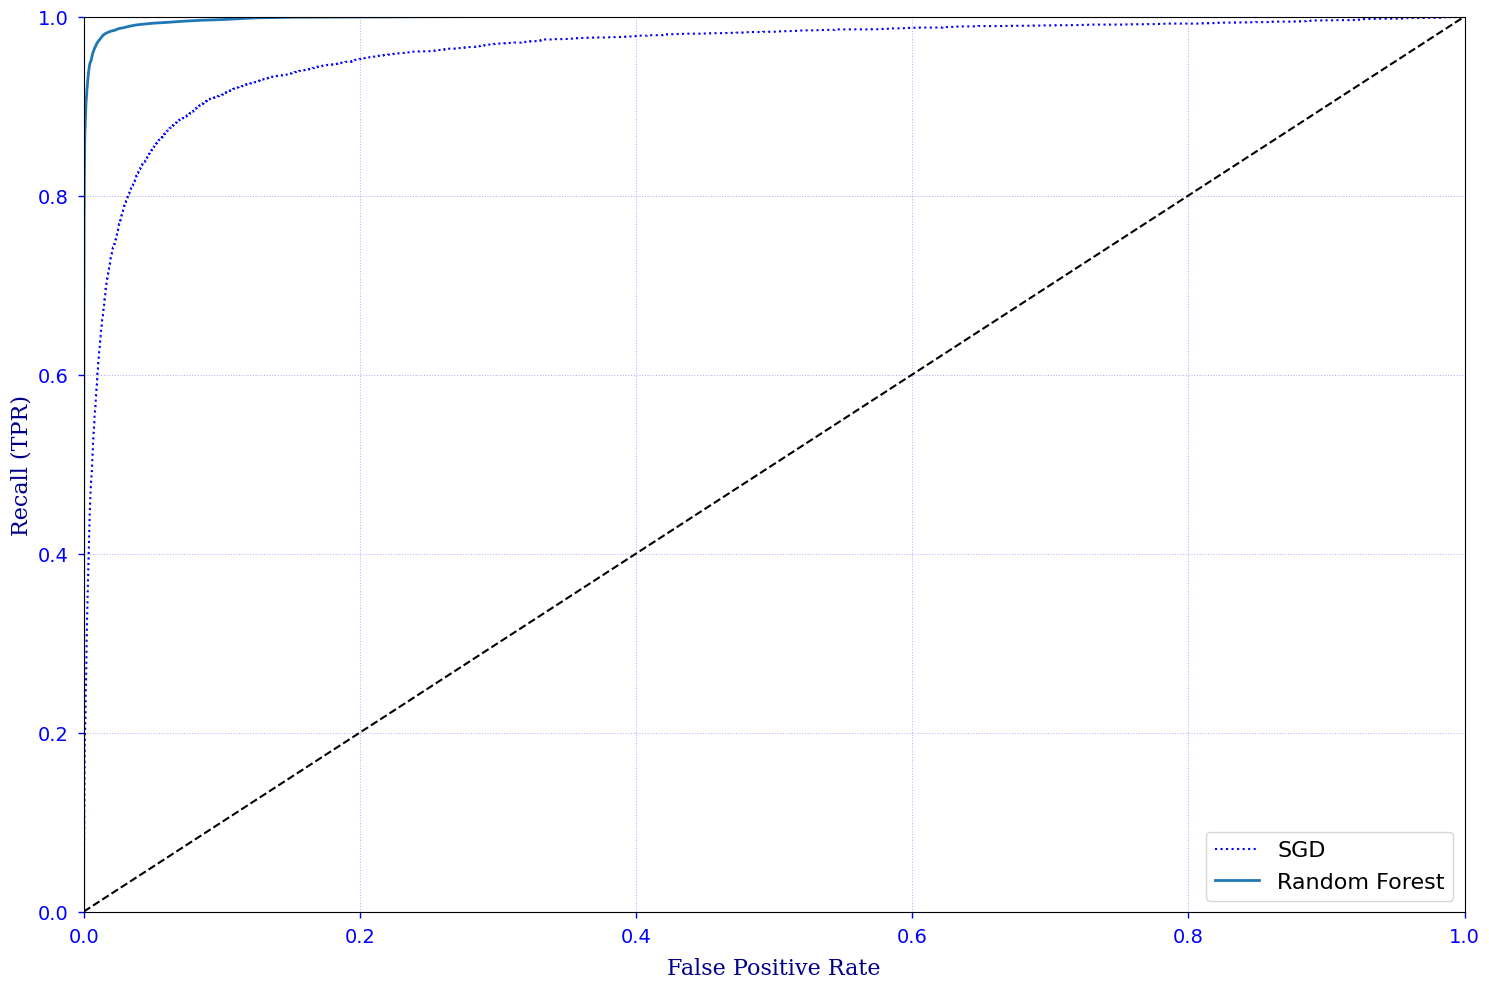

In [44]:
plt.subplots(figsize=(15, 10))

plt.plot(fpr, tpr, "b:", label="SGD")  # ROC curve for the SGDClassifier; "b:" -> blue dotted curve

plt.plot(fpr_forest, tpr_forest,       # ROC curve for the RandomForestClassifier; continuous curve
         linewidth=2,
         label="Random Forest")        # Labels are used for legend

plt.plot([0, 1], [0, 1], "k--")        # ROC Curve for a purely random classifier; "k--" -> black dashed line

plt.xlabel("False Positive Rate",labelpad=8, color='darkblue', name='serif', size=16)

plt.ylabel("Recall (TPR)", color='darkblue', name='serif', size=16)

plt.legend(loc="lower right", fontsize=16)

plt.tick_params(axis="both",    # or 'x', 'y', 'both'
                which='major',  # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='out',   # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b',
                labelsize=14,
                pad=7)             # Distance from tick to label (in points)

plt.axis([0, 1, 0, 1])  # ox and oy axes from 0 to 1

'Place the left and bottom spines to x=0 and y=0, respectively:'
ax = plt.gca()  # gca (get current axes) - returns the current subplot

ax.spines['left'].set_position(('data', 0))

plt.grid(which='both',  # 'both', 'minor', 'major' (default)
         axis='both',   # 'both', 'x', 'y'
         color='b', alpha=0.3, linestyle=':', linewidth=0.75)

plt.tight_layout()
plt.show()

#### d) Compute the AUC:

In [45]:
roc_auc_score(y_train_5, y_scores_forest)  # 0.998

0.9983436731328145

<b>Notice that:</b><br>
- the <b>RandomForestClassifier</b> model gives a ROC curve which is closer to the top-left corner than in case of the <b>RSGDClassifier</b> model<br>
=> has a greater AUC<br>
=> is superior if compared to the SGDClassifier;
- AUC for the <b>RandomForestClassifier</b> = 0.998
- AUC for the <b>RSGDClassifier</b> = 0.960<br>
<br>

**What you learned so far:**
- how to train binary classifiers;
- how to choose the appropriate metric for your task;
- how to evaluate your classifiers using cross-validation;
- how to select the precision/recall tradeoff that fits your needs;
- how to compare various models using ROC curves and ROC AUC scores.

***Following:*** how to detect more than just the 5s!<br>

### Exercitiu:
**Nota:**<br>
Incercati sa rezolvati acest exercitiu singuri, apoi comparati cu raspunsul din celula urmatoare.<br>

Pentru modelul <i>RandomForestClassifier</i>, masurati precizia si sensibilitatea (recall), apoi comparati-le cu cele ale modelului SGDClassifier.<br><br>
***Indicatii:***
Se calculeaza matricea confuziilor si se evalueaza performanta:<br><br>
a) Se creeaza un vector al predictiilor (deci, completat cu True si False), cu dimensiunea si forma lui <i>y_probas_forest[:,1]</i>; valorile "True" corespund probabilitatilor >= 0.5 (se poate considera valoarea 0.5 ca barem);<br>
<i>Indicatie:</i> se poate utiliza functia <i>full_like()</i> din Numpy, pentru a returna un array cu aceeasi dimensiune si aceeasi forma ca si <i>y_probas_forest[:,1]</i>, completat cu valorile boolene care rezulta din inegalitatea <i>y_probas_forest[:,1]>=0.5</i><br><br>
b) Folosind vectorul de la (a), se calculeaza matricea confuziilor;<br><br>
c) Se calculeaza precizia, sensibilitatea (recall) si scorul F1.

In [46]:
# Se calculeaza matricea confuziilor si se evalueaza performanta:

# a) Se creeaza vectorul predictiilor de dimensiunea lui y_probas_forest[:,1]; "True" sunt probabilitatile >= 0.5
#    (se poate considera valoarea 0.5 ca barem!)

threshold = 0.5  # Probabilitatea minima ca imaginea sa se incadreze la True (sa reprezinte cifra 5)

y_train_pred_forest = np.full_like(y_probas_forest[:,1], y_probas_forest[:,1]>=threshold, dtype=bool)

print(y_train_pred_forest)

# -------------------------------------------------------------------------------------------------------------

# b) Se calculeaza matricea confuziilor:

confusion_matrix(y_train_5, y_train_pred_forest)

# -------------------------------------------------------------------------------------------------------------

# c) Se calculeaza precizia, sensibilitatea (recall) si scorul F1:

print()

print("Precision: ", precision_score(y_train_5, y_train_pred_forest).round(4))

print("Recall: ", recall_score(y_train_5, y_train_pred_forest).round(4))

print("F1 score: ", f1_score(y_train_5, y_train_pred_forest).round(4))

[ True False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False  True False False False False False False False False False False False False ... False False False False False  True False  True False False False False False False False False  True False False False  True False False False False False False False  True False False False False False False False False False False
 False False False False False False False False False False False False False False  True False False False  True False False]

Precision:  0.9897
Recall:  0.8725
F1 score:  0.9275


# Multiclass Classification
- <font color='blue'><b>Binary classifiers</b></font>: distinguish between two classes; examples of binary algorithms: <b>Stochastic Gradient Descent</b>, <b>Support Vector Machines</b>;
- <font color='blue'><b>Multiclass classifiers</b></font> (or <font color='blue'><b>multinomial classifiers</b></font>): distinguish between many classes; examples of multiclass algorithms: <b>Logistic Regression</b>, <b>Random Forest</b>, <b>naive Bayes</b>.

## Using binary classifiers for multi-class classification
### 1. <font color='blue'><b>One-vs-the-Rest (OvR)</b></font> strategy (or <font color='blue'><b>One-vs-All</b></font>)
As an example of OvR, to create a system that can classify the handwritten digit images into 10 classes (from 0 to 9), you should train 10 binary classifiers (one for each digit: a 0-detector, a 1-detector, a 2-detector, etc.). When you want to classify an image, each classifier outputs a decision score for that image; you select the class whose classifier outputs the highest score.<br><br>
Below is an example with only 3 classes:<br>
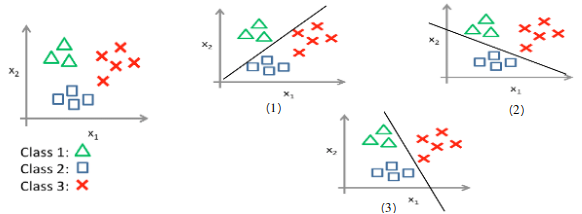

#### OvR training procedure (simple example on the above picture):
#### Step (1):
- Create a training set where class 1 is assigned to the positive class (True values), while classes 2 and 3 are assigned to the negative class (False values);
- Fit a binary classifier $h_{\theta }^{(1)}(x)$, which is designed to identify class 1 objects, where <i>(1)</i> is class 1, and $\theta$ is the vector of parameters of <i>h</i>;

#### Step (2):
- Create a training set where class 2 is assigned to the positive class (True values), while classes 1 and 3 are assigned to the negative class (False values);
- Fit another binary classifier $h_{\theta }^{(2)}(x)$, which is designed to identify class 2 objects, where <i>(2)</i> refers to class 2;

#### Step (3):
- Create a training set where class 3 is assigned to the positive class (True values), while classes 1 and 2 are assigned to the negative class (False values);
- Fit a third binary classifier $h_{\theta }^{(3)}(x)$, which is designed to identify class 3 objects, where <i>(3)</i> refers to class 3;

#### Summary:
We fit 3 binary classifiers $h_{\theta }^{(i)}(x)=P(y=i|x; \theta), (i=1, 2, 3)$. Each of them is trying to estimate what is the probability that <i>y</i> is class <i>i</i>, given the input image <b>x</b> and being parameterized by $\theta$.  
For example, in step (1) $h^{(1)}$ is trying to recognize the triangles => what is the probability that <i>y = 1</i> for each instance (image) of the dataset: $P(y=1|x, \theta)$<br>
In other words, each classifier is trained to detect objects belonging to one of the 3 classes.
#### Conclusions
- <b>OvA</b> - training a binary classifier $h_{\theta }^{(i)}(x)$ for each class <i>i</i> to predict the probability that <i>y = i</i>;
- <u>To make a prediction</u> when a new instance <b>x</b> is given, run all binary classifiers (3 in our example) on the input <b>x</b>, and select the class <i>i</i> with the maximum probability (pick the class that is the most confident).

### 2. <font color='blue'><b>One-vs-One (OvO)</b></font> strategy
Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the ***one-versus-one (OvO)*** strategy.<br>
In our example with 3 classes (triangles, squares, and crosses), one classifier should distinguish between crosses and triangles, another one between crosses and squares, and the third one between squares and triangles:

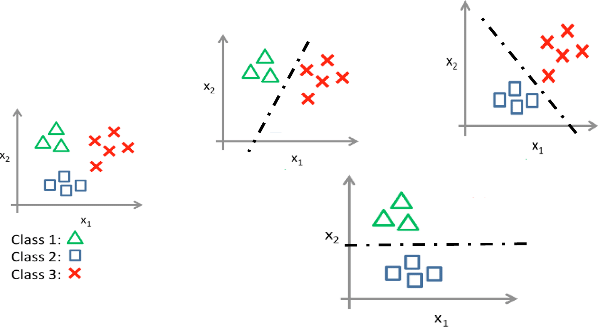
#### OvO training procedure (simple example on the above picture):
- **Step (1):** Extract from the full training set a training subset with only two classes (for example, triangles and crosses);

- **Step (2):** Train a binary classifier on this subset to distinguish between these two classes;

- **Step (3):** Repeat the above steps for other pairs of classes; in this example, for squares and crosses, then for triangles and squares;<br>

The number of trained classifiers = number of pairs of classes; in our example, we have 3 subsets => 3 trained classifiers.<br>
<u>To make a prediction</u> when a new instance <b>x</b> is given, run all classifiers (3 in our example) on the input <b>x</b>, and select the class <i>i</i> which has the maximum probability.
#### Disadvantage
The number of classifiers can be large: $$C_{n}^{2}=\frac{n\cdot (n-1)}{2}$$<br>
where <i>n</i> is the number of classes => in the case of MNIST dataset we will have 45 classifiers => to predict a digit, its image should be run on all the 45 classifiers!
#### Advantage
Each classifier will be trained only on a small subset of the training set, that contains the 2 classes that it must distinguish.
#### Some notes:
- Some algorithms scale poorly with the size of the training set (eg. <b>Support Vector Machines</b>) => <b>OvO</b> is preffered because it is faster to train many classifiers on small datasets than to train few classifiers on large training sets;
- However, for most of the binary classifiers, <b>OvR</b> is preffered;
- Scikit-Learn detects when you try to use a binary classification algorithm for multiclass classification, and automatically runs OvO or OvR, depending on the algorithm;
- To force Scikit-Learn to use OvO or OvR, use <font color='blue'><b>OneVsOneClassifier</b></font> or <font color='blue'><b>OneVsRestClassifier</b></font> classes (create an object of one of these 2 types and pass it a binary classifier, as we will see later). They can also be used with <b>multinomial classifiers</b>.

#### MULTICLASS CLASSIFICATION - example with the Support Vector Machine binary algorithm:

#### a) Create a Support Vector Classifier object and train it (by default, it will use the OvO method):

In [47]:

from sklearn.svm import SVC   # SVC - Support Vector Classifier


svm_clf = SVC(random_state=42)

svm_clf.fit(X_train, y_train)   # use y_train, not y_train_5!
                                # Attention: training takes a lot of time! Scikit-Learn automatically selected
                                # the OvO strategy (trained 45 SVC classifiers)

SVC(random_state=42)

#### b) Try to predict some digits:

In [48]:
print(svm_clf.predict([X[0], X[2]]))  # X[0] was was passed through each of the 45 trained classifiers; 
                                      # => 45 decision scores; the class that "won most duels" was selected
                                      # The same - for X[2]

[5 4]


#### c) Print the scores for X[0] 
Use <i>decision_function()</i> to return one score per class => 10 scores (the scores show the chance that X[0] is  0, 1, 2, ..., 8, or 9):

In [49]:
X_0_score = svm_clf.decision_function([X[0]])

print(X_0_score)  # The highest score corresponds to class 5: 9.313

print("The index of the highest score is", np.argmax(X_0_score))

svm_clf.classes_  # Shows all the target classes from the training set


[[ 1.725  2.728  7.251  8.308 -0.311  9.313  1.71   2.768  6.23   4.848]]
The index of the highest score is 5


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Force the SVC object (<i>svm_clf</i>) to use OvR algorithm
<b>a) Train the algorithm:</b>

In [50]:
from sklearn.multiclass import OneVsRestClassifier


# Pass the svm_clf object as an argument to the OneVsRestClassifier class:
ovr_clf = OneVsRestClassifier(svm_clf,
                              n_jobs=-1)  # Attention! Training takes very long without n_jobs (around 20 minutes)!

%time ovr_clf.fit(X_train, y_train)

CPU times: user 4.05 s, sys: 1.72 s, total: 5.78 s
Wall time: 8min 4s


OneVsRestClassifier(estimator=SVC(random_state=42), n_jobs=-1)

<b>b) Make predictions for the first 10 digits in the dataset (including for X[0]):</b>

In [51]:

for i in range(15):
    print(ovr_clf.predict([X[i]]), ";  ", y_train[i])  # Print both the prediction and the corresponding label
    

[5] ;   5
[0] ;   0
[4] ;   4
[1] ;   1
[9] ;   9
[2] ;   2
[1] ;   1
[3] ;   3
[1] ;   1
[4] ;   4
[3] ;   3
[5] ;   5
[3] ;   3
[6] ;   6
[1] ;   1


#### Now, train another binary algorithm - the SGD classifier (SGD - Stochastic Gradient Descent); use the entire training set for training:
<b>a) Train the algorithm:</b>

In [52]:

sgd_clf.fit(X_train, y_train)  # By default, SkLearn uses the OvR algorithm (10 binary classifiers are trained)
                               # Note: the sgd_clf object was previously defined in cell [9].

SGDClassifier(n_jobs=-1, random_state=42)

<b>b) Make predictions for one digit:</b>

In [53]:

print(f'Predicted: {sgd_clf.predict([X[2]])}\nActual: {y_train[2]}\n\n')

scores = sgd_clf.decision_function([X[2]])
    
print(f"Scores: {scores};\n\nIndex of the highest score: {np.argmax(scores)}")


Predicted: [4]
Actual: 4


Scores: [[-34143.407 -21942.138  -4018.293  -2239.193     43.094 -15058.881 -33653.311  -8277.806  -7460.52  -14180.153]];

Index of the highest score: 4


Notice that the highest score is the one corresponding to class 4. The model is confident about its decision, because all the other scores are large negative numbers (much lower than the highest score).

#### c) Evaluate the SGD classifier (compute the accuracy) using cross-validation:

In [54]:

accuracy_3_folds = cross_val_score(sgd_clf,
                                   X_train, y_train,
                                   cv=3,
                                   n_jobs=-1,
                                   scoring="accuracy")  # Takes some time!


In [55]:
print('Accuracy for each fold: ', accuracy_3_folds)

print('Mean accuracy: ', accuracy_3_folds.mean().round(3))

Accuracy for each fold:  [0.874 0.858 0.869]
Mean accuracy:  0.867


The mean accuracy is over 86%, which is a good one. Scale the inputs (<i>X_train</i>) to improve the accuracy:

#### d) Improve the accuracy through standardization of the training set:

In [56]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

accuracy_scaled = cross_val_score(sgd_clf,
                                  X_train_scaled, y_train,
                                  cv=3,
                                  n_jobs=-1,
                                  scoring="accuracy")

In [57]:
print('Accuracy for each fold, after scaling: ', accuracy_scaled)

print('Mean accuracy after scaling: ', accuracy_scaled.mean().round(3))

Accuracy for each fold, after scaling:  [0.898 0.891 0.902]
Mean accuracy after scaling:  0.897


Notice that the accuracy increases to almost 90% when the input data was scaled.

### ERROR ANALYSIS
In a real project, the steps presented on file **"Parcursul unui proiect ML" (see Moodle)** should be followed: explore data preparation options, try multiple algorithms, fine-tune their hyperparameters using <i>GridSearchCV</i>, automate as much as possible the entire procedure. In this project however, we suppose that we found the most promissing model (***sgd_clf***) and look for ways to improve it, such as analyzing the types of errors it makes. In this respect, the following steps will be performed:
#### 1. Make predictions in order to compute the confusion matrix:

In [58]:
y_train_pred = cross_val_predict(sgd_clf,
                                 X_train_scaled, y_train,
                                 n_jobs=-1,
                                 cv=3)

#### 2. Use predictions to compute the confusion matrix:

In [59]:
conf_mx = confusion_matrix(y_train, y_train_pred) 

print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


### Some theory:
Suppose that the confusion matrix is the one showed on the following image:<br><br>
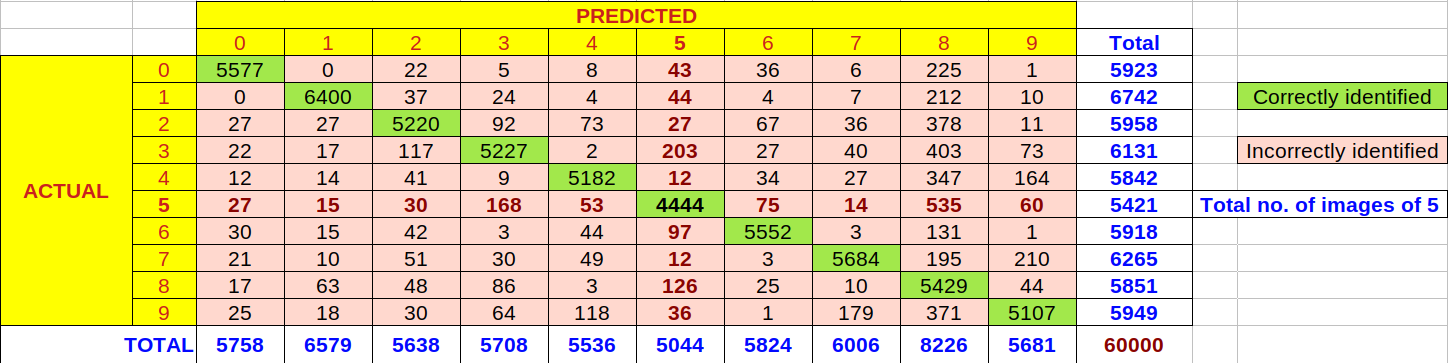<br>

Following, the procedure to find various metrics will be presented through an example on computing <i>sensitivity (Recall)</i> and <i>specificity</i> for images representing digit 5.
- <font color='blue'><b>Sensitivity</b></font> (<font color='blue'><b>Recall</b></font>, or <font color='blue'><b>True Positive Rate/TPR</b></font>) for digit 5 - from the total no. of 5s, what proportion was identified:<br><br>
$$Sensitivity_5 = \frac{TP_5}{(TP_5 + FN_5)} = \frac{4444}{(4444+977)} = 0.82$$<br>
<b>=> 82% of the images of 5 were identified.</b><br>

In the above equation:
- $TP_5$: <b>True Positives</b> (4444 images were correctly identified as being 5-s);
- $FN_5$: <b>False Negatives</b> (977 images of 5 that were incorrectly identified as **not** being 5):


#### Notice that:
$TP_5 + FN_5 = 4444 + 977 = 5421$, which is the total number of actual 5-s
- <font color='blue'><b>Specificity</b></font> (or <font color='blue'><b>True Negative Rate/TNR</b></font>) for digit 5 - from the total no. of non-5s, what proportion was correctly identified as not being 5:<br><br>
$$Specificity_5 = \frac{TN_5}{(TN_5 + FP_5)} = \frac{53979}{(53979 + 600)} = \frac{53979}{54579} = 0.99$$<br>
<b>=> 99% of the images that are NOT 5 were correctly identified as not being 5.</b><br>

In the above equation:
- $TN_5$: <b>True Negatives</b> (53 979 images of digits <b>other than 5</b> were correctly identified as not being 5-s):

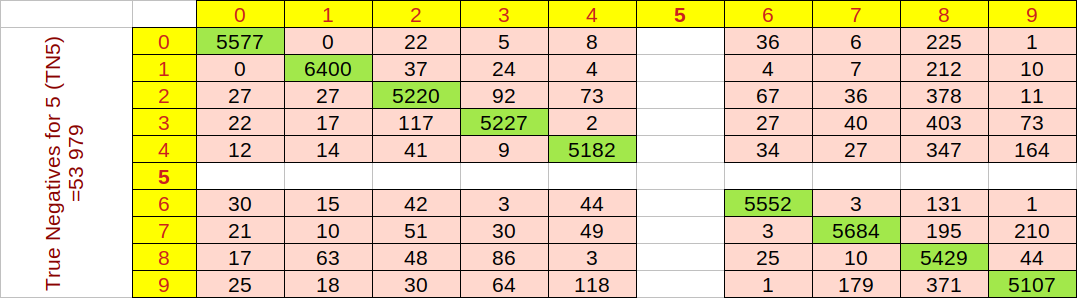

- $FP_5$: <b>False Positives</b> (600 images of digits <b>other than 5</b> were incorrectly identified as being 5-s):
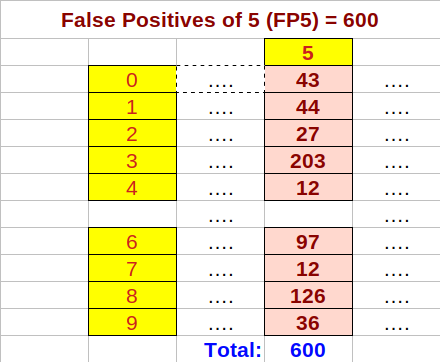

#### 3. Analize the image representation of the confusion matrix
(as an image, it is easier to interpret the errors than when lookind at numbers)<br><br>
<b>3.1. Plot the confusion matrix as an image:</b>

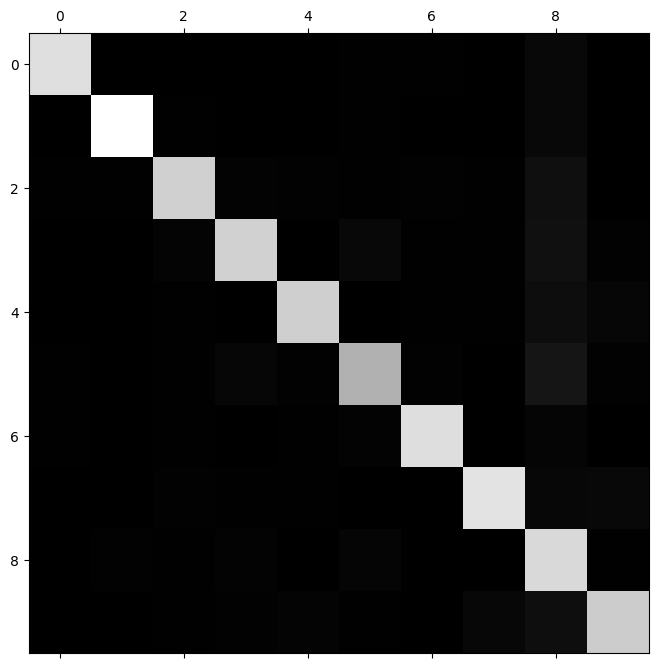

In [60]:
plt.figure(figsize=(8,8))

plt.matshow(conf_mx,           # matshow - displays an array as a figure; 
            fignum=1,          # applies the above established figure size;
            cmap=plt.cm.gray)  # use shades of gray to color the image;
plt.show()

# see matshow official documentation at:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

#### First, analyze the diagonal (numbers of images correctly identified):
- The colours on the main diagonal tend to be white, while the rest tend to be black => digits were correctly classified (high number of correctly identified images on the main diagonal);
- The 5-s look slightly darker => 2 main reasons can cause this:
    - fewer images of 5 on the dataset than the others => fewer images are identified as 5-s => the number on the main diagonal corresponding to 5 is lower than the other values on the main diagonal, and/or
    - the classifier does not perform as well on images of 5 as on the other digits.

#### Second, analyze the other cells (the off-diagonal cells are the errors the classifier makes for each digit):
We will compare the relative errors for each class, instead of the absolute errors, because the absolute errors will make abundent classes look pretty bad when compared to classes with lower numbers of images.

For example, number 5 was confused with number 8 for 535 times (the absolute error is 535). Since the dataset contains 5421 images of number 5, the relative error is obtained by normalization: 535/5421 = 0.099 (or, 9.9%). Thus, the relative errors allow us to compare the errors made for each class.

<b>3.2. Transform the values in <i>conf_mx</i> in relative errors, by dividing with the no of images in each class => <u>normalized confusion matrix</u></b>
- Compute the <u>numbers of images in each class</u> (row sums in confusion matrix):

In [61]:
row_sums = conf_mx.sum(axis=1,
                       keepdims=True)  # keepdims=True: result will be a 2D array instead of a 1D one
print("Number of images in each class:")
print(row_sums)

Number of images in each class:
[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


- Divide each row with the total number of images in that row, to obtain the <u>normalized confusion matrix</u> (matrix of relative errors).
We will divide ***conf_mx*** with ***row_sums***. However, ***conf_mx*** is a 10x10 array, while ***row_sums*** is a 10x1 array. Therefore, the NumPy broadcasting property will be used. See the following figure to remember how broadcasting works in case of division:
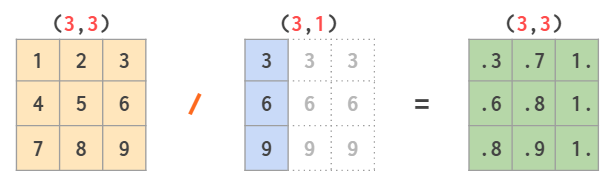

In [62]:

norm_conf_mx = conf_mx / row_sums  # values in the first row are divided with the no of 0-s,
                                   # values in the second row are divided with the number of 1-s, etc.

print("Normalized confusion matrix:\n")

print(norm_conf_mx.round(3))


Normalized confusion matrix:

[[0.942 0.    0.004 0.001 0.001 0.007 0.006 0.001 0.038 0.   ]
 [0.    0.949 0.005 0.004 0.001 0.007 0.001 0.001 0.031 0.001]
 [0.005 0.005 0.876 0.015 0.012 0.005 0.011 0.006 0.063 0.002]
 [0.004 0.003 0.019 0.853 0.    0.033 0.004 0.007 0.066 0.012]
 [0.002 0.002 0.007 0.002 0.887 0.002 0.006 0.005 0.059 0.028]
 [0.005 0.003 0.006 0.031 0.01  0.82  0.014 0.003 0.099 0.011]
 [0.005 0.003 0.007 0.001 0.007 0.016 0.938 0.001 0.022 0.   ]
 [0.003 0.002 0.008 0.005 0.008 0.002 0.    0.907 0.031 0.034]
 [0.003 0.011 0.008 0.015 0.001 0.022 0.004 0.002 0.928 0.008]
 [0.004 0.003 0.005 0.011 0.02  0.006 0.    0.03  0.062 0.858]]


<b>3.3. Exclude from the analysis the images correctly identified (those on the main diagonal) in order to keep only the relative errors, by filling the diagonal with 0-s (colors of the highest relative errors will be closer to white, while 0-s will be black):

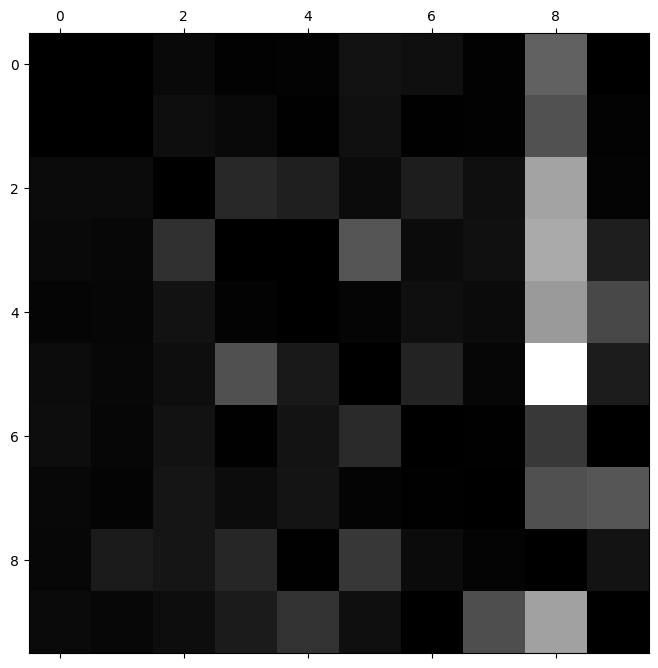

In [63]:
np.fill_diagonal(norm_conf_mx, 0)  # fill diagonal with 0-s

plt.figure(figsize=(8,8))

plt.matshow(norm_conf_mx,
            fignum=1,
            cmap=plt.cm.gray)

plt.show()

<b>3.4. Use colour intensities to interpret the errors (the lighter the colour, the higher the relative error):</b>
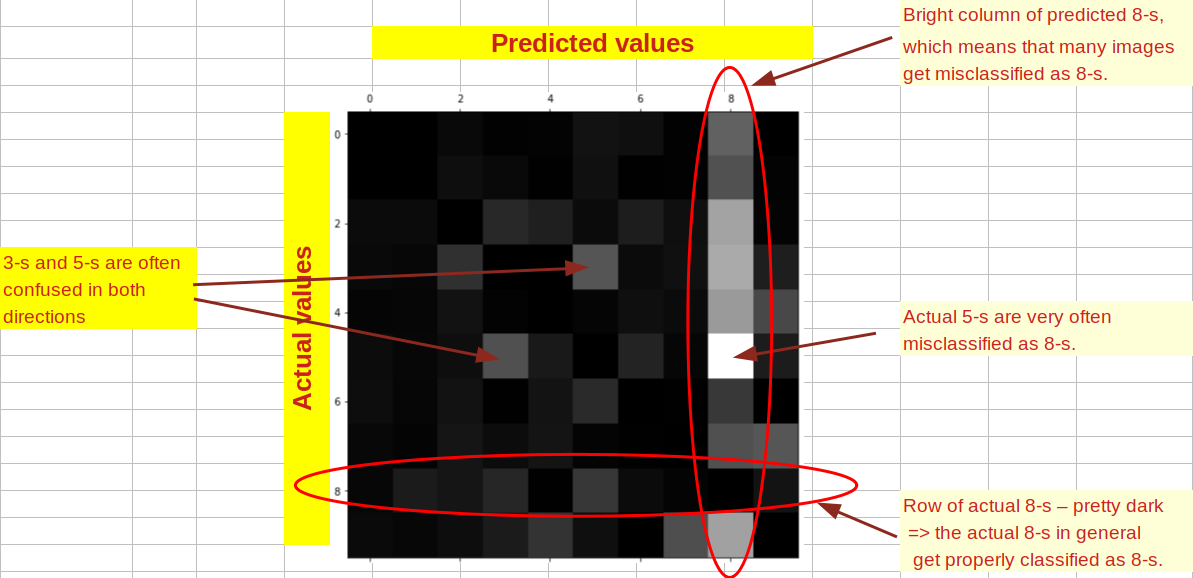
<br><br><b> 3.5. Take decisions on how to improve the classifier.</b><br><br>
In this case, try to reduce for example the false 8-s:
- get more training samples for digits that look like 8, but are not 8 (the classifier will learn to distinguish them from actual 8-s);<br><br>
- engineer (create) new features that can be helpful for the classifier, such as developing an algorithm to count the number of loops (one loop for 6, 2 loops for 8, no loop for 7, etc.);<br><br>
- preprocess the images to make some patterns stand out more, such as closed loops (Scikit-Image, Pillow, or OpenCV can be used).

**3.6. If necessary, analyze individual errors to see what the classifier is doing** (this is more dificult and time-consuming, depending on the number of individual errors).<br>
Here for example, we saw that 3-s and 5-s are often confused in both directions. Let's analyze these individual errors (the images of 3-s and 5-s that are correctly identified, as well as the images that are confused with each other)<br><br>
<u>Procedure</u>:<br>
3.6.1. Write a function to plot groups of digits aranged in rows and columns; for example:<br>
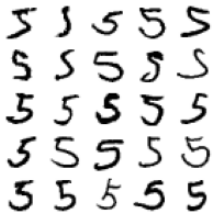
3.6.2. Select the following images from the training set:<br>
   - images of actual 3-s that are corectly identified as being 3;
   - images of actual 3-s that are confused with 5;
   - images of actual 5-s that are corectly identified as being 5;
   - images of actual 5-s that are confused with 3.<br>

3.6.3. Plot some images from the above groups;<br>

3.6.4. Analyze the plots and draw conclusions.

**3.6.1. Write a function to plot groups of digits aranged in rows and columns**<br>
The following function takes as inputs the array of images to plot, and the number of images per row.

In [64]:

import matplotlib


""" Note:
    Suppose you want to plot the first 25 images from X (plot 5 rows of images, with 5 images per row, similar 
    with the above figure). You will call the plot_digits function as follows:

    plot_digits(X[:25], images_per_row=5)
"""


def plot_digits(arr_of_imgs_to_plot, images_per_row=5):
    
    size = 28  # the size of each image is 28 x 28 pixels
    
    # Take each row from arr_of_imgs_to_plot and transform it into a 28x28 array; put all these arrays into a list:
    images = [instance.reshape(size,size) for instance in arr_of_imgs_to_plot]  # each instance (image) is a vector
                                                                                # of 784 pixel intensities; reshape
                                                                                #  it to 28 x 28 pixels.
    n_rows = int((len(arr_of_imgs_to_plot)) / images_per_row)   # Establishes how many rows will have the group
                                                                # of images to be plotted
    # About len(arr_of_imgs_to_plot): if, for example arr_of_imgs_to_plot is X[:25] =>
    # len(X[:25]) returns the number of rows, which is 25 (and this is the number of images to plot).
    
    
    row_images = []  # Initialize an empty list
    
    for row in range(n_rows):
        # Take one row of images at a time from the array "images", and put them onto the "images_from_a_row" list:
        images_from_a_row = images[row * images_per_row : (row + 1) * images_per_row]

        # Concatenate horizontally all images from a row into a single array => shape 28 x 140,
        # because (5 images per row) x (28 columns per image) = 140:
        concatenated_row = np.concatenate(images_from_a_row, axis=1)
        
        # Append the 28x140 array to the "row images" list:
        row_images.append(concatenated_row)


    image = np.concatenate(row_images, axis=0)  # Concatenate all the elements from the "row_images" list
                                                # one below the other, into a single array of shape 140 x 140

    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

[array([[1, 1, 3, 3],
       [2, 2, 4, 4]]), array([[5, 5, 7, 7],
       [6, 6, 8, 8]])]
[[1 1 3 3]
 [2 2 4 4]
 [5 5 7 7]
 [6 6 8 8]]


(-0.5, 3.5, 3.5, -0.5)

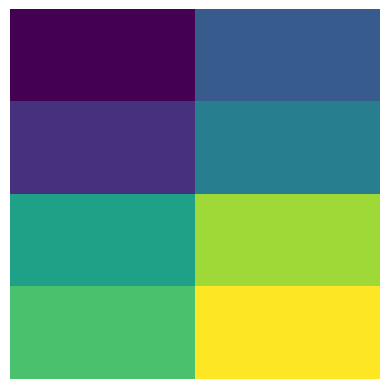

In [65]:
""" This cell can be used as a much simpler example to better understand how the above function is working """

row_images_1 = []

# -------------------------------------------------------------------------

# Suppose row 1 has two images (a and b), each of 2x2 pixels:
a = np.array([[1, 1],
              [2, 2]])  # image 1 from row 1

b = np.array([[3, 3],
              [4, 4]])  # image 2 from row 1

concatenated_row_1 = np.concatenate([a, b], axis=1)    # [[1 1 3 3]
row_images_1.append(concatenated_row_1)                #  [2 2 4 4]]

# -------------------------------------------------------------------------

# Suppose row 2 has also two images (c and d), each of 2x2 pixels:
c = np.array([[5, 5],
              [6, 6]])  # image 1 from row 2
d = np.array([[7, 7],
              [8, 8]])  # image 2 from row 2
concatenated_row_2 = np.concatenate([c, d], axis=1)    # [[5 5 7 7]
row_images_1.append(concatenated_row_2)                #  [6 6 8 8]]

print(row_images_1)  # List of the above 2 arrays:
                                                    # [array([[1, 1, 3, 3],
                                                    #         [2, 2, 4, 4]]), array([[5, 5, 7, 7],
                                                    #                                [6, 6, 8, 8]])]

# -------------------------------------------------------------------------

# Transform the "row_images" list into an array, using np.concatenate:
image_1 = np.concatenate(row_images_1, axis=0)

print(image_1)    # [[1 1 3 3]
                  #  [2 2 4 4]
                  #  [5 5 7 7]
                  #  [6 6 8 8]]

plt.imshow(image_1)#, cmap = matplotlib.cm.binary)
plt.axis("off")

**3.6.2. Select the following images from the training set:**<br>
   - images of actual 3-s that are corectly identified as being 3;
   - images of actual 3-s that are confused with 5;
   - images of actual 5-s that are corectly identified as being 5;
   - images of actual 5-s that are confused with 3.

In [66]:
X_33 = X_train[(y_train==3) & (y_train_pred==3)]  # Images from X_train that are corectly identified as 3

X_35 = X_train[(y_train==3) & (y_train_pred==5)]  # Images of 3 from X_train, that are confused with 5

X_55 = X_train[(y_train==5) & (y_train_pred==5)]  # Images from X_train that are corectly identified as 5

X_53 = X_train[(y_train==5) & (y_train_pred==3)]  # Images of 5 from X_train, that are confused with 3

**3.6.3. Plot some images from the above groups**


     The following two columns of images are:
Digits classified as 3-s:    Digits classified as 5-s:


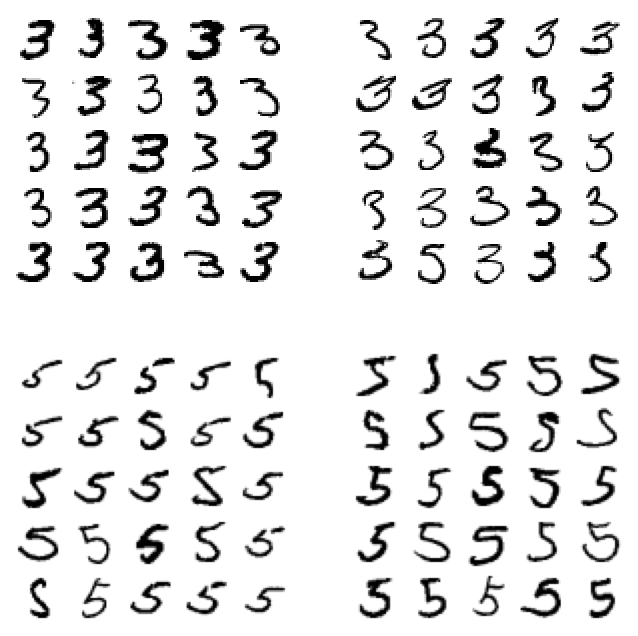

In [67]:
print("\n     The following two columns of images are:")
print("Digits classified as 3-s:    Digits classified as 5-s:")

plt.figure(figsize=(8, 8))

plt.subplot(221)                          # 221: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_33[:25], images_per_row=5)  # this is the first subplot (upper-left group of digits)

plt.subplot(222)                          # 222: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_35[:25], images_per_row=5)  # this is the 2-nd subplot (upper-right group of digits)

plt.subplot(223)                          # 223: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_55[:25], images_per_row=5)  # This is the 3-rd subplot (lower-left group of digits)

plt.subplot(224)                          # 224: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_53[:25], images_per_row=5)  # This is the 4-th subplot (lower-right group of digits)

**3.6.4. Analyze the plots and draw conclusions**<br><br>
The two 5×5 blocks on the left show digits classified as 3-s, and the two 5×5 blocks on the right show images classified as 5-s. Some of the digits that the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so badly written that even a human would have trouble classifying them (e.g., the 5 on the 1 st row and 2 nd column truly looks like a badly written 3). However, for most of the misclassified images, it’s hard to understand why the classifier made the mistakes it did. The reason is that we used a simple SGDClassifier (to be discussed in detail in a later lecture), which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them.<br><br>

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. In other words, this classifier is quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce other errors as well.

## MULTILABEL CLASSIFICATION

A <font color='blue'><b>multilabel classification</b></font> system - a classification system that outputs multiple binary tags for one instance.<br><br>

<u>Example</u> for a face recognition classifier:
- The system was trained to recognize 3 people: Dan, George, and Andreea.
- The input instance is a picture with many people. Among them: Dan and Andreea.
- When the system is shown the picture, it returns a list of binary tags (one <u>binary tag</u> per person it recognizes), so it should output [1, 0, 1]. This means "Dan True, George False, Andreea True".<br>

<font color='blue'>**Tag**</font> - a label that the system attaches to an object.

**Example using the MNIST dataset:**<br>
1. Create 2 vectors of labels for the training set:
    - one vector of labels for numbers >= 7, called <i>y_train_large</i>
    - one vector of labels for odd numbers, called <i>y_train_odd</i><br>
2. Create a multilabel array, called <i>y_multilabel</i>
3. Fit a classifier that supports the multilabel classification;
4. Make predictions with the trained classifier;
5. Evaluate the performance of the model.

**1. Create 2 vectors of labels for the training set:**
   - one vector of labels for numbers >= 7, called <i>y_train_large</i>
   - one vector of labels for odd numbers, called <i>y_train_odd</i><br>

In [68]:
y_train_large = (y_train >= 7)

y_train_odd = (y_train % 2 == 1)

**2. Create a multilabel array, called <i>y_multilabel</i>**

In [69]:
y_multilabel = np.c_[y_train_large, y_train_odd]  # Concatenate the above 2 vectors to obtain y_multilabel

print(y_multilabel[:20])

[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [ True  True]]


**3. Fit a classifier that supports the multilabel classification.**<br>

The algorithm to be used: **K-Nearest Neighbors**.
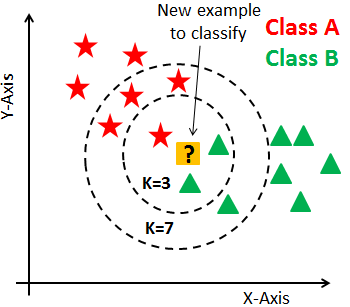

In [70]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(n_jobs=-1)

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1)

**4. Make predictions with the trained classifier.**<br>

In [71]:
# Making a prediction for a single image - X[0] (this is an image of digit 5):
knn_clf.predict([X[0]])  # returns array([[False,  True]])

array([[False,  True]])

<i>knn_clf.predict([X[0]])</i> returns [False,  True]], which is right: 5 is lower than 7 (False) and odd (True).

**5. Compute the performance of the model.**<br>

In this example:
- Make predictions for all images in the training set;
- Compute the **F1 score** (or any other metric for binary classifiers) for each label;
- Compute the **<u>average</u> F1 score**.

In [72]:
y_train_knn_pred = cross_val_predict(knn_clf,
                                     X_train, y_multilabel,
                                     cv=3,
                                     n_jobs=-1)

In [73]:
print(y_train_knn_pred[:20])

[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [ True  True]]


In [74]:

f1_score(y_multilabel,
         y_train_knn_pred,
         average="macro")


0.976410265560605

Using ***macro***, we assumed that all labels are equally important. Sometimes this may not be the case. For example, if a dataset of pictures with people has many more pictures of Andreea than of Dan or George, you may want to give more weight to the classifier’s score on pictures of Andreea.<br>
This is possible by giving each label (tag) a weight proportional to its no of appearances (more generaly: the number of true instances for each label, which translates to the number of samples with a given label). To achieve this, set ***average="weighted"*** in the above code.<br><br>
More details here:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html<br><br>


## <font color='blue'>MULTIOUTPUT-MULTICLASS CLASSIFICATION</font>
<font color='blue'>Multioutput classification</font> - a generalization of **multilabel classification**, where each label (tag) can be multiclass (each label can have one of many values).

<u>**Example**</u>:<br>
**Objective**: Build a system that cleans noisy images. It will take as input a noisy image (pixels intensities are altered by the noise) and will output a cleaned one (pixels intensities are **predicted** such as the image is now clean). Following is an example of a noisy image vs. a cleaned one.<br>

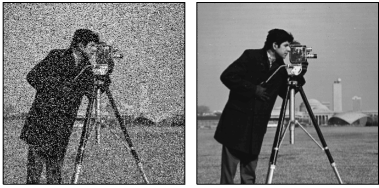

=> the input is **multilabel** (one label per pixel), and each label can have multiple values (intensities from 0 to 255).<br><br>
We will use the <u>original MNIST dataset</u> (where each image is clean), and a <u>changed MNIST dataset</u> (where each image is altered by noise):
- The altered dataset will be the training set (each pixel has an altered intensity value);
- The original dataset will represent the training labels (each pixel is a label with the correct intensity value => 784 labels per image, with values from 0 to 255).<br>

Thus, for each image with altered pixel intensities, the system will try to learn what the correct pixel intensities should be => instead of predicting what number each image represents, the system will predict 784 values, one for each pixel, such as the image is now clean.
<br><br>

**Steps**:<br>
**1.** In order to create the altered dataset, first create a noise matrix with the same size of the original <i>X_train</i>:
- the number of rows = <i>len(X_train)</i> (=> 60 000);
- the number of columns = 784.

The matrix will be filled with random values between 0 and 100:

In [75]:

noise = np.random.randint(0, 100,               # noise: random integer values, between 0 and 100
                          (len(X_train), 784))  # Pay attention: put the matrix dimension in a tuple


**2.** Create the altered <u>training set</u>, and the corresponding labels (which are now represented by ***X_train***)<br>

In [76]:
X_train_modified = X_train + noise  # This is a training set, consisting of noisy images

y_train_modified = X_train          # Labels will be represented by the original set of clean images
                                    # (one label for each pixel in X_train)

**3.** Similarly, create the <u>testing set</u> and the corresponding labels:

In [77]:
noise = np.random.randint(0, 100, (len(X_test), 784))

X_test_modified = X_test + noise

y_test_modified = X_test


#### As an example, plot a noisy image and its corresponding label:

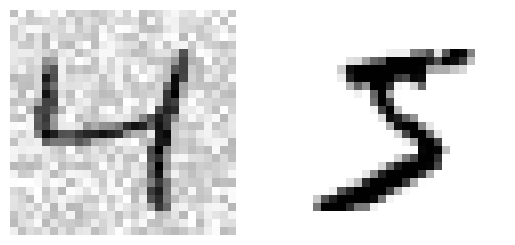

In [78]:
some_noisy_digit = X_train_modified[2]               # Vector of noisy pixels

some_noisy_image = some_noisy_digit.reshape(28, 28)  # Reshape the vector (28 x 28 pixels)

plt.subplot(121)  # plotting space is arranged as a grid of 1 row and 2 columns; the first grid cell was selected

plt.imshow(some_noisy_image, cmap='binary')

plt.axis('off')

# --------------------------------------------

some_clean_digit = y_train_modified[2]                # Vector of pixels with correct intensities

some_clean_image = some_digit.reshape(28, 28)

plt.subplot(122)  # plotting space is arranged as a grid of 1 row and 2 columns; the 2-nd grid cell was selected

plt.imshow(some_clean_image, cmap='binary')

plt.axis('off')

plt.show()

**4.** Train the <i>knn_clf</i> classifier and make predictions:

In [79]:

# Train the classifier on the training dataset:

knn_clf.fit(X_train_modified,
            y_train_modified)


KNeighborsClassifier(n_jobs=-1)

In [80]:
np.set_printoptions(edgeitems=60,    # Number of array items at the beginning and end of each dimension
                    linewidth=600,   # Number of characters per line 
                    precision=3)     # Number of digits for floating point numbers

In [81]:

# Make a prediction on an altered digit from the testing dataseset:
# ----------------------------------------------------------------

# Use the following line of code to see what numbers are at each position in the testing set:
print(y_test)

img_idx = 6  # index of noisy image to be cleaned

cleaned_digit = knn_clf.predict([X_test_modified[img_idx]])  # at index 6 there is an handwritten 4;
                                                             # cleaned_digit is a vector of cleaned pixels

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 ... 6 5 3 3 3 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 5 2 4 9 4 3 6 4 1 7 2 6 5 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]


**5.** Plot the predicted digit:

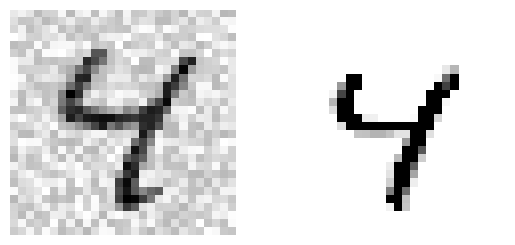

In [82]:
noisy_digit = X_test_modified[img_idx]
noisy_image = noisy_digit.reshape(28, 28)
plt.subplot(121)
plt.imshow(noisy_image, cmap='binary')
plt.axis('off')

# --------------------------------------------

cleaned_image = cleaned_digit.reshape(28, 28)
plt.subplot(122)
plt.imshow(cleaned_image, cmap='binary')
plt.axis('off')
plt.show()

#### Reset printoptions to default:

In [83]:

np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan', precision=8,
                    suppress=False, threshold=1000, formatter=None)

### You should now know the following:
- The procedure to make classification;
- How to select good metrics for classification;
- How to deal with precision/recall trade-off;
- How to compare classifiers.